### Setting up the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
player2023 = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2023_per_game.html')

In [3]:
player2023[0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,13,0,19.8,2.8,7.3,...,.829,1.8,4.6,6.5,1.4,0.2,0.8,1.2,1.6,8.3
1,2,Steven Adams,C,29,MEM,33,33,26.7,3.6,6.2,...,.330,5.1,6.1,11.2,2.2,0.8,1.2,1.9,2.3,8.1
2,3,Bam Adebayo,C,25,MIA,34,34,35.2,8.4,15.6,...,.831,2.7,7.1,9.9,3.2,1.0,0.7,3.0,3.2,21.5
3,4,Ochai Agbaji,SG,22,UTA,16,0,7.9,1.1,2.6,...,.444,0.4,0.7,1.1,0.2,0.1,0.0,0.0,0.8,2.7
4,5,Santi Aldama,PF,22,MEM,33,16,23.3,3.4,7.2,...,.716,1.2,4.0,5.2,1.3,0.7,0.9,0.6,2.3,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,486,Delon Wright,PG,30,WAS,9,0,19.4,1.9,4.8,...,.727,0.7,1.6,2.2,3.4,2.1,0.4,0.7,1.0,5.3
514,487,McKinley Wright IV,PG,24,DAL,8,0,10.9,0.9,1.9,...,.000,0.5,0.6,1.1,1.3,0.8,0.1,0.6,1.1,1.8
515,488,Thaddeus Young,PF,34,TOR,33,9,17.2,2.2,4.1,...,.737,1.7,2.0,3.6,1.7,1.1,0.1,0.8,1.9,5.0
516,489,Trae Young,PG,24,ATL,33,33,35.8,8.7,21.0,...,.890,0.8,2.2,3.0,10.0,0.8,0.2,3.8,1.5,27.5


In [4]:
player2023_df = player2023[0]

In [5]:
dataTypeDict = dict(player2023_df.dtypes)
print(dataTypeDict)

{'Rk': dtype('O'), 'Player': dtype('O'), 'Pos': dtype('O'), 'Age': dtype('O'), 'Tm': dtype('O'), 'G': dtype('O'), 'GS': dtype('O'), 'MP': dtype('O'), 'FG': dtype('O'), 'FGA': dtype('O'), 'FG%': dtype('O'), '3P': dtype('O'), '3PA': dtype('O'), '3P%': dtype('O'), '2P': dtype('O'), '2PA': dtype('O'), '2P%': dtype('O'), 'eFG%': dtype('O'), 'FT': dtype('O'), 'FTA': dtype('O'), 'FT%': dtype('O'), 'ORB': dtype('O'), 'DRB': dtype('O'), 'TRB': dtype('O'), 'AST': dtype('O'), 'STL': dtype('O'), 'BLK': dtype('O'), 'TOV': dtype('O'), 'PF': dtype('O'), 'PTS': dtype('O')}


In [6]:
player2023_df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [7]:
player_pos = player2023_df[['Player','Pos']].copy()
player_pos

,Player,Pos
0,Precious Achiuwa,C
1,Steven Adams,C
2,Bam Adebayo,C
3,Ochai Agbaji,SG
4,Santi Aldama,PF
...,...,...
513,Delon Wright,PG
514,McKinley Wright IV,PG
515,Thaddeus Young,PF
516,Trae Young,PG


In [8]:
player2023_df[['G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']] = player2023_df[['G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].apply(lambda col:pd.to_numeric(col,errors='coerce'))

In [9]:
dataTypeDict = dict(player2023_df.dtypes)
print(dataTypeDict)

{'Rk': dtype('O'), 'Player': dtype('O'), 'Pos': dtype('O'), 'Age': dtype('O'), 'Tm': dtype('O'), 'G': dtype('float64'), 'GS': dtype('float64'), 'MP': dtype('float64'), 'FG': dtype('float64'), 'FGA': dtype('float64'), 'FG%': dtype('float64'), '3P': dtype('float64'), '3PA': dtype('float64'), '3P%': dtype('float64'), '2P': dtype('float64'), '2PA': dtype('float64'), '2P%': dtype('float64'), 'eFG%': dtype('float64'), 'FT': dtype('float64'), 'FTA': dtype('float64'), 'FT%': dtype('float64'), 'ORB': dtype('float64'), 'DRB': dtype('float64'), 'TRB': dtype('float64'), 'AST': dtype('float64'), 'STL': dtype('float64'), 'BLK': dtype('float64'), 'TOV': dtype('float64'), 'PF': dtype('float64'), 'PTS': dtype('float64')}


In [10]:
player2023_df.columns[5:]

Index(['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [11]:
columns = player2023_df.columns[5:]

In [12]:
player2023_df = player2023_df.groupby('Player',as_index=False)[columns].mean()

In [13]:
player2023_df

,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Green,14.000000,0.0,7.9,1.4,2.6,0.514,0.9,2.1,0.448,...,1.000,0.2,0.8,1.0,0.4,0.1,0.0,0.2,1.1,3.9
1,A.J. Lawson,1.333333,0.0,1.5,0.5,1.0,0.500,0.0,0.5,0.000,...,NaN,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.5,1.0
2,AJ Griffin,33.000000,10.0,21.6,4.1,8.8,0.464,1.7,4.5,0.369,...,0.875,0.6,1.6,2.3,1.0,1.0,0.1,0.8,1.2,10.3
3,Aaron Gordon,32.000000,32.0,30.4,6.6,11.3,0.583,1.0,2.6,0.373,...,0.651,2.6,4.3,6.9,2.4,1.0,0.8,1.6,1.8,17.1
4,Aaron Holiday,33.000000,3.0,16.9,1.8,4.2,0.436,0.7,1.6,0.442,...,0.826,0.5,1.0,1.5,1.6,0.7,0.2,0.7,1.7,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,Zach Collins,26.000000,6.0,20.6,3.5,6.3,0.545,0.6,1.6,0.357,...,0.704,1.9,3.7,5.6,2.4,0.4,0.9,2.2,3.5,9.0
487,Zach LaVine,33.000000,33.0,35.1,8.2,17.8,0.458,2.8,7.4,0.380,...,0.838,0.5,3.8,4.3,4.3,1.0,0.1,2.4,2.4,22.7
488,Zeke Nnaji,27.000000,2.0,10.7,1.6,2.7,0.581,0.1,0.6,0.176,...,0.750,1.0,0.6,1.6,0.2,0.2,0.2,0.5,1.6,3.9
489,Ziaire Williams,10.000000,0.0,17.1,2.0,5.4,0.370,0.4,2.7,0.148,...,1.000,0.2,2.9,3.1,1.4,0.5,0.2,1.3,2.0,4.6


In [14]:
player2023_df = pd.merge(player_pos,player2023_df,on='Player',how='outer')
player2023_df

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,13.0,0.0,19.8,2.8,7.3,0.389,0.4,2.2,...,0.829,1.8,4.6,6.5,1.4,0.2,0.8,1.2,1.6,8.3
1,Steven Adams,C,33.0,33.0,26.7,3.6,6.2,0.583,0.0,0.0,...,0.330,5.1,6.1,11.2,2.2,0.8,1.2,1.9,2.3,8.1
2,Bam Adebayo,C,34.0,34.0,35.2,8.4,15.6,0.539,0.0,0.3,...,0.831,2.7,7.1,9.9,3.2,1.0,0.7,3.0,3.2,21.5
3,Ochai Agbaji,SG,16.0,0.0,7.9,1.1,2.6,0.405,0.3,1.3,...,0.444,0.4,0.7,1.1,0.2,0.1,0.0,0.0,0.8,2.7
4,Santi Aldama,PF,33.0,16.0,23.3,3.4,7.2,0.475,1.3,3.5,...,0.716,1.2,4.0,5.2,1.3,0.7,0.9,0.6,2.3,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Delon Wright,PG,9.0,0.0,19.4,1.9,4.8,0.395,0.7,2.4,...,0.727,0.7,1.6,2.2,3.4,2.1,0.4,0.7,1.0,5.3
514,McKinley Wright IV,PG,8.0,0.0,10.9,0.9,1.9,0.467,0.0,0.4,...,0.000,0.5,0.6,1.1,1.3,0.8,0.1,0.6,1.1,1.8
515,Thaddeus Young,PF,33.0,9.0,17.2,2.2,4.1,0.548,0.1,0.7,...,0.737,1.7,2.0,3.6,1.7,1.1,0.1,0.8,1.9,5.0
516,Trae Young,PG,33.0,33.0,35.8,8.7,21.0,0.414,2.2,7.2,...,0.890,0.8,2.2,3.0,10.0,0.8,0.2,3.8,1.5,27.5


In [15]:
player2023_df.sort_values(by='FG%',ascending=False)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
228,Trevor Hudgins,PG,1.0,0.0,4.0,1.0,1.0,1.000,1.0,1.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
266,Braxton Key,SF,3.0,0.0,3.0,0.3,0.3,1.000,0.0,0.0,...,1.000,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.0,1.3
389,Micah Potter,PF,3.0,0.0,4.7,0.7,0.7,1.000,0.0,0.0,...,NaN,0.3,0.7,1.0,0.7,0.0,0.0,0.0,0.7,1.3
105,Justin Champagnie,SF,3.0,0.0,3.7,1.0,1.0,1.000,0.0,0.0,...,NaN,0.3,1.0,1.3,0.3,0.0,0.0,0.0,0.3,2.0
17,Udoka Azubuike,C,15.0,0.0,4.2,0.8,0.9,0.857,0.0,0.0,...,0.333,0.7,1.1,1.8,0.3,0.1,0.2,0.2,0.3,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Michael Foster Jr.,PF,1.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219,Malcolm Hill,SF,3.0,0.0,0.3,0.0,0.0,NaN,0.0,0.0,...,NaN,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.0,0.0
310,Cody Martin,SF,1.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427,Dereon Seabron,SG,2.0,0.0,1.5,0.0,0.0,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
player2023_df = player2023_df.replace(np.nan,0)

In [17]:
# seeing how many games have already been played in the season
total_games_played = max(player2023_df['G'])
total_games_played

39.0

In [18]:
test = [player2023_df.values[i] for i in range(0,len(player2023_df)) if player2023_df['G'][i]>=(total_games_played/2)]

In [19]:
active_player_df = pd.DataFrame(test)

In [20]:
active_player_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,Steven Adams,C,33.0,33.0,26.7,3.6,6.2,0.583,0.0,0.0,...,0.330,5.1,6.1,11.2,2.2,0.8,1.2,1.9,2.3,8.1
1,Bam Adebayo,C,34.0,34.0,35.2,8.4,15.6,0.539,0.0,0.3,...,0.831,2.7,7.1,9.9,3.2,1.0,0.7,3.0,3.2,21.5
2,Santi Aldama,PF,33.0,16.0,23.3,3.4,7.2,0.475,1.3,3.5,...,0.716,1.2,4.0,5.2,1.3,0.7,0.9,0.6,2.3,9.6
3,Nickeil Alexander-Walker,SG,26.0,2.0,15.5,2.5,5.1,0.489,1.1,2.7,...,0.731,0.3,1.3,1.6,2.3,0.7,0.4,1.3,1.7,6.8
4,Grayson Allen,SG,33.0,31.0,27.4,3.3,7.6,0.437,1.8,4.7,...,0.923,1.0,2.7,3.7,2.6,0.7,0.2,1.2,1.4,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,Justise Winslow,SF,29.0,11.0,26.8,2.8,6.8,0.409,0.5,1.6,...,0.714,1.7,3.3,5.0,3.4,1.0,0.4,1.5,3.1,6.8
337,Christian Wood,PF,35.0,10.0,27.8,6.6,12.1,0.544,1.8,4.5,...,0.708,1.2,6.7,7.9,1.6,0.5,1.1,2.1,2.9,17.8
338,Thaddeus Young,PF,33.0,9.0,17.2,2.2,4.1,0.548,0.1,0.7,...,0.737,1.7,2.0,3.6,1.7,1.1,0.1,0.8,1.9,5.0
339,Trae Young,PG,33.0,33.0,35.8,8.7,21.0,0.414,2.2,7.2,...,0.890,0.8,2.2,3.0,10.0,0.8,0.2,3.8,1.5,27.5


In [21]:
active_player_df.columns = ['Player', 'Pos','G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS']

In [22]:
active_player_df['G'].min()

20.0

In [23]:
active_player_df.drop_duplicates('Player',inplace=True)

In [24]:
active_player_df

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,33.0,33.0,26.7,3.6,6.2,0.583,0.0,0.0,...,0.330,5.1,6.1,11.2,2.2,0.8,1.2,1.9,2.3,8.1
1,Bam Adebayo,C,34.0,34.0,35.2,8.4,15.6,0.539,0.0,0.3,...,0.831,2.7,7.1,9.9,3.2,1.0,0.7,3.0,3.2,21.5
2,Santi Aldama,PF,33.0,16.0,23.3,3.4,7.2,0.475,1.3,3.5,...,0.716,1.2,4.0,5.2,1.3,0.7,0.9,0.6,2.3,9.6
3,Nickeil Alexander-Walker,SG,26.0,2.0,15.5,2.5,5.1,0.489,1.1,2.7,...,0.731,0.3,1.3,1.6,2.3,0.7,0.4,1.3,1.7,6.8
4,Grayson Allen,SG,33.0,31.0,27.4,3.3,7.6,0.437,1.8,4.7,...,0.923,1.0,2.7,3.7,2.6,0.7,0.2,1.2,1.4,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,Justise Winslow,SF,29.0,11.0,26.8,2.8,6.8,0.409,0.5,1.6,...,0.714,1.7,3.3,5.0,3.4,1.0,0.4,1.5,3.1,6.8
337,Christian Wood,PF,35.0,10.0,27.8,6.6,12.1,0.544,1.8,4.5,...,0.708,1.2,6.7,7.9,1.6,0.5,1.1,2.1,2.9,17.8
338,Thaddeus Young,PF,33.0,9.0,17.2,2.2,4.1,0.548,0.1,0.7,...,0.737,1.7,2.0,3.6,1.7,1.1,0.1,0.8,1.9,5.0
339,Trae Young,PG,33.0,33.0,35.8,8.7,21.0,0.414,2.2,7.2,...,0.890,0.8,2.2,3.0,10.0,0.8,0.2,3.8,1.5,27.5


In [25]:
player2023_df

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,13.0,0.0,19.8,2.8,7.3,0.389,0.4,2.2,...,0.829,1.8,4.6,6.5,1.4,0.2,0.8,1.2,1.6,8.3
1,Steven Adams,C,33.0,33.0,26.7,3.6,6.2,0.583,0.0,0.0,...,0.330,5.1,6.1,11.2,2.2,0.8,1.2,1.9,2.3,8.1
2,Bam Adebayo,C,34.0,34.0,35.2,8.4,15.6,0.539,0.0,0.3,...,0.831,2.7,7.1,9.9,3.2,1.0,0.7,3.0,3.2,21.5
3,Ochai Agbaji,SG,16.0,0.0,7.9,1.1,2.6,0.405,0.3,1.3,...,0.444,0.4,0.7,1.1,0.2,0.1,0.0,0.0,0.8,2.7
4,Santi Aldama,PF,33.0,16.0,23.3,3.4,7.2,0.475,1.3,3.5,...,0.716,1.2,4.0,5.2,1.3,0.7,0.9,0.6,2.3,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Delon Wright,PG,9.0,0.0,19.4,1.9,4.8,0.395,0.7,2.4,...,0.727,0.7,1.6,2.2,3.4,2.1,0.4,0.7,1.0,5.3
514,McKinley Wright IV,PG,8.0,0.0,10.9,0.9,1.9,0.467,0.0,0.4,...,0.000,0.5,0.6,1.1,1.3,0.8,0.1,0.6,1.1,1.8
515,Thaddeus Young,PF,33.0,9.0,17.2,2.2,4.1,0.548,0.1,0.7,...,0.737,1.7,2.0,3.6,1.7,1.1,0.1,0.8,1.9,5.0
516,Trae Young,PG,33.0,33.0,35.8,8.7,21.0,0.414,2.2,7.2,...,0.890,0.8,2.2,3.0,10.0,0.8,0.2,3.8,1.5,27.5


In [26]:
player2023_df['2WAY'] = ((player2023_df['PTS']/player2023_df['PTS'].mean())+(player2023_df['AST']/player2023_df['AST'].mean())+(player2023_df['TRB']/player2023_df['TRB'].mean())+(player2023_df['STL']/player2023_df['STL'].mean())+(player2023_df['BLK']/player2023_df['BLK'].mean())-(player2023_df['TOV']/player2023_df['TOV'].mean()))

In [27]:
player2023_df['YAHOO'] = ((player2023_df['FG']/player2023_df['FG'].mean()))+((player2023_df['FGA']**player2023_df['FG%'])/(player2023_df['FGA'].mean()**player2023_df['FG%'].mean()))+((player2023_df['FTA']**player2023_df['FT%'])/(player2023_df['FTA'].mean()**player2023_df['FT%'].mean()))+(player2023_df['3P']/player2023_df['3P'].mean())+(player2023_df['PTS']/player2023_df['PTS'].mean())+(player2023_df['TRB']/player2023_df['TRB'].mean())+(player2023_df['AST']/player2023_df['AST'].mean())+(player2023_df['STL']/player2023_df['STL'].mean())+(player2023_df['BLK']/player2023_df['BLK'].mean())-(player2023_df['TOV']/player2023_df['TOV'].mean())

In [28]:
active_player_df['2WAY'] = ((active_player_df['PTS']/active_player_df['PTS'].mean())+(active_player_df['AST']/active_player_df['AST'].mean())+(active_player_df['TRB']/active_player_df['TRB'].mean())+(active_player_df['STL']/active_player_df['STL'].mean())+(active_player_df['BLK']/active_player_df['BLK'].mean())-(active_player_df['TOV']/active_player_df['TOV'].mean()))

In [29]:
# Old FG% and FT% method--> worse
#active_player_df['YAHOO'] = ((active_player_df['FG']/active_player_df['FG'].mean()))+((active_player_df['FG%']*active_player_df['FG'])/(active_player_df['FG%'].mean()*active_player_df['FG'].mean()))+((active_player_df['FT%']*active_player_df['FT'])/(active_player_df['FT%'].mean()*active_player_df['FT'].mean()))+(active_player_df['3P']/active_player_df['3P'].mean())+(active_player_df['PTS']/active_player_df['PTS'].mean())+(active_player_df['TRB']/active_player_df['TRB'].mean())+(active_player_df['AST']/active_player_df['AST'].mean())+(active_player_df['STL']/active_player_df['STL'].mean())+(active_player_df['BLK']/active_player_df['BLK'].mean())-(active_player_df['TOV']/active_player_df['TOV'].mean())

In [30]:
active_player_df['YAHOO'] = ((active_player_df['FG']/active_player_df['FG'].mean()))+((active_player_df['FGA']**active_player_df['FG%'])/(active_player_df['FGA'].mean()**active_player_df['FG%'].mean()))+((active_player_df['FTA']**active_player_df['FT%'])/(active_player_df['FTA'].mean()**active_player_df['FT%'].mean()))+(active_player_df['3P']/active_player_df['3P'].mean())+(active_player_df['PTS']/active_player_df['PTS'].mean())+(active_player_df['TRB']/active_player_df['TRB'].mean())+(active_player_df['AST']/active_player_df['AST'].mean())+(active_player_df['STL']/active_player_df['STL'].mean())+(active_player_df['BLK']/active_player_df['BLK'].mean())-(active_player_df['TOV']/active_player_df['TOV'].mean())

In [31]:
active_player_df['Defense'] = (active_player_df['TRB']/active_player_df['TRB'].mean())+(active_player_df['STL']/active_player_df['STL'].mean())+(active_player_df['BLK']/active_player_df['BLK'].mean())-(active_player_df['TOV']/active_player_df['TOV'].mean())

In [32]:
active_player_df['FG/FT%'] = (active_player_df['FG%']+active_player_df['FT%'])/2

In [33]:
active_player_df['FG%'].mean()*active_player_df['FG'].mean()

1.938190778373079

In [34]:
active_player_df['FG%'].mean(),active_player_df['FG'].mean()

(0.47785630498533727, 4.056011730205278)

In [35]:
active_player_df['YAHOO'].mean()

7.936903409766813

### Making dfs for each position

In [36]:
active_player_df.Pos.unique()

array(['C', 'PF', 'SG', 'PG', 'SF'], dtype=object)

PF

In [37]:
PF_1 = active_player_df['Pos'] == 'PF'
PF_2 = active_player_df['Pos'] == 'SF-PF'
PF_3 = active_player_df['Pos'] == 'PF-C'
PF_4 = active_player_df['Pos'] == 'PF-SF'
PF_5 = active_player_df['Pos'] == 'C-PF'

PF_df = active_player_df.loc[PF_1 | PF_2 | PF_3 | PF_4 | PF_5]
PF_df.drop_duplicates(subset='Player',keep='first',inplace=True)
PF_df = PF_df.drop(['G','GS'],axis=1)
PF_df

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Player,Pos,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
2,Santi Aldama,PF,23.3,3.4,7.2,0.475,1.3,3.5,0.379,2.1,...,1.3,0.7,0.9,0.6,2.3,9.6,5.086027,8.790887,3.684470,0.5955
7,Kyle Anderson,PF,24.9,2.8,5.8,0.472,0.5,1.3,0.417,2.2,...,3.5,1.1,0.7,1.4,2.0,7.9,5.162284,8.126714,3.002603,0.6410
8,Giannis Antetokounmpo,PF,33.7,11.5,21.5,0.533,0.8,3.0,0.253,10.7,...,5.2,0.9,0.9,3.8,3.6,32.1,8.219778,16.318890,3.180052,0.5890
12,Marvin Bagley III,PF,21.3,4.3,8.0,0.537,0.4,1.3,0.273,4.0,...,0.6,0.5,0.7,0.9,2.0,10.6,4.125253,7.546627,2.923634,0.6530
14,Paolo Banchero,PF,34.1,6.9,15.8,0.435,1.2,3.9,0.308,5.7,...,3.9,0.9,0.6,3.0,2.4,20.9,5.420141,11.823957,1.925847,0.5950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Kenrich Williams,PF,21.4,3.0,5.6,0.525,0.7,2.0,0.364,2.3,...,1.5,0.6,0.3,0.4,2.0,7.0,3.479875,6.165461,2.229295,0.4900
334,Patrick Williams,PF,28.5,3.6,8.0,0.454,1.4,3.4,0.400,2.3,...,1.3,0.6,0.9,1.4,2.0,9.5,4.065777,7.522031,2.673211,0.6840
335,Zion Williamson,PF,33.0,9.8,16.2,0.608,0.2,0.7,0.368,9.6,...,4.6,1.1,0.6,3.4,2.2,26.0,6.228611,13.210374,1.985858,0.6610
337,Christian Wood,PF,27.8,6.6,12.1,0.544,1.8,4.5,0.403,4.8,...,1.6,0.5,1.1,2.1,2.9,17.8,5.627223,11.530099,3.364083,0.6260


C

In [38]:
C1 = active_player_df['Pos'] == 'C'
C2 = active_player_df['Pos'] == 'PF-C'
C3 = active_player_df['Pos'] == 'C-PF'

C_df = active_player_df.loc[C1 | C2 | C3]
C_df.drop_duplicates(subset='Player',keep='first',inplace=True)
C_df = C_df.drop(['G','GS'],axis=1)
C_df

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Player,Pos,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
0,Steven Adams,C,26.7,3.6,6.2,0.583,0.0,0.0,0.000,3.6,...,2.2,0.8,1.2,1.9,2.3,8.1,6.565279,9.222554,4.925926,0.4565
1,Bam Adebayo,C,35.2,8.4,15.6,0.539,0.0,0.3,0.100,8.4,...,3.2,1.0,0.7,3.0,3.2,21.5,6.293413,12.146398,3.035026,0.6850
5,Jarrett Allen,C,33.7,5.6,9.0,0.626,0.0,0.1,0.000,5.6,...,1.5,0.8,1.2,1.5,2.3,14.0,6.862961,11.048906,4.982932,0.6685
11,Deandre Ayton,C,29.1,7.6,12.6,0.605,0.2,0.6,0.368,7.4,...,1.9,0.5,0.8,2.1,2.9,17.5,5.443070,10.232948,3.082681,0.6680
13,Mo Bamba,C,18.9,3.0,5.9,0.503,1.1,2.9,0.379,1.9,...,1.1,0.3,1.1,0.7,2.3,8.1,4.677699,7.907872,3.493841,0.5960
20,Charles Bassey,C,13.6,2.0,3.0,0.671,0.1,0.3,0.333,2.0,...,1.2,0.3,1.0,1.1,2.1,4.9,3.902530,5.755161,2.965011,0.6690
29,Khem Birch,C,8.1,1.0,1.6,0.594,0.1,0.1,0.500,0.9,...,0.4,0.3,0.3,0.4,1.2,2.2,1.436736,2.441658,1.073274,0.6970
30,Bismack Biyombo,C,13.7,1.6,2.8,0.578,0.0,0.0,0.000,1.6,...,0.9,0.3,1.4,1.0,2.0,3.6,4.228059,5.848927,3.531664,0.4600
44,Moses Brown,C,6.5,1.3,2.2,0.625,0.0,0.0,0.000,1.3,...,0.1,0.1,0.4,0.3,0.9,3.6,1.819271,3.429075,1.454146,0.5570
47,Thomas Bryant,C,20.8,4.6,7.0,0.663,0.6,1.2,0.464,4.0,...,1.0,0.4,0.5,0.8,2.1,11.6,4.030819,7.991918,2.573644,0.6790


SG

In [39]:
SG1 = active_player_df['Pos'] == 'SG'
SG2 = active_player_df['Pos'] == 'SG-SF'
SG3 = active_player_df['Pos'] == 'SF-SG'
SG4 = active_player_df['Pos'] == 'SG-PG'
SG5 = active_player_df['Pos'] == 'PG-SG'

SG_df = active_player_df.loc[SG1 | SG2 | SG3 | SG4 | SG5]
SG_df.drop_duplicates(subset='Player',keep='first',inplace=True)
SG_df = SG_df.drop(['G','GS'],axis=1)
SG_df

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Player,Pos,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
3,Nickeil Alexander-Walker,SG,15.5,2.5,5.1,0.489,1.1,2.7,0.420,1.4,...,2.3,0.7,0.4,1.3,1.7,6.8,2.824895,5.681691,1.261032,0.6100
4,Grayson Allen,SG,27.4,3.3,7.6,0.437,1.8,4.7,0.383,1.5,...,2.6,0.7,0.2,1.2,1.4,10.3,3.409453,7.594944,1.406638,0.6800
18,RJ Barrett,SG,34.1,6.9,16.1,0.427,1.8,5.3,0.332,5.1,...,3.0,0.5,0.2,2.4,2.4,19.7,3.683412,9.993989,0.669701,0.5945
19,Will Barton,SG,21.2,2.8,7.6,0.368,1.3,3.7,0.364,1.5,...,2.6,0.5,0.3,1.2,1.1,7.8,2.901543,6.002061,1.123532,0.5840
24,Bradley Beal,SG,34.5,8.9,16.8,0.527,1.6,4.6,0.343,7.3,...,5.2,1.0,0.6,2.8,1.9,23.5,5.747666,12.924286,1.481265,0.6925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Lonnie Walker IV,SG,29.8,5.3,11.7,0.455,2.1,5.4,0.384,3.3,...,1.4,0.8,0.3,1.0,1.7,14.7,3.477203,8.727207,1.575637,0.6650
322,Duane Washington Jr.,SG,11.1,2.9,7.2,0.401,1.1,3.3,0.329,1.8,...,1.5,0.2,0.0,0.8,0.5,7.1,1.215323,4.012259,-0.044248,0.4505
328,Derrick White,SG,26.3,3.4,7.5,0.452,1.5,4.0,0.376,1.9,...,3.1,0.8,0.8,1.0,2.3,10.1,4.992560,8.926364,2.800686,0.6525
329,Aaron Wiggins,SG,18.9,2.3,5.0,0.470,0.7,1.8,0.375,1.7,...,1.4,0.6,0.1,0.9,1.6,6.3,2.419683,4.983948,1.273457,0.6320


SF

In [40]:
SF1 = active_player_df['Pos'] == 'SF'
SF2 = active_player_df['Pos'] == 'SF-PF'
SF3 = active_player_df['Pos'] == 'SG-SF'
SF4 = active_player_df['Pos'] == 'SF-SG'
SF5 = active_player_df['Pos'] == 'PF-SF'

SF_df = active_player_df.loc[SF1 | SF2 | SF3 | SF4 | SF5]
SF_df.drop_duplicates(subset='Player',keep='first',inplace=True)
SF_df = SF_df.drop(['G','GS'],axis=1)
SF_df

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Player,Pos,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
9,OG Anunoby,SF,36.8,6.9,14.7,0.471,1.8,5.2,0.353,5.1,...,2.2,2.2,0.8,2.5,3.0,18.6,6.922802,12.904022,4.339274,0.6545
10,Deni Avdija,SF,26.1,3.0,7.1,0.427,0.9,3.1,0.300,2.1,...,2.7,0.8,0.6,1.5,3.0,8.3,4.512526,7.631561,2.648146,0.6070
21,Keita Bates-Diop,SF,17.8,2.9,5.6,0.522,0.5,1.3,0.351,2.5,...,0.8,0.6,0.1,0.8,0.8,7.5,2.163443,4.908732,1.157763,0.6660
26,MarJon Beauchamp,SF,15.0,2.2,5.6,0.403,1.1,3.3,0.337,1.1,...,0.5,0.5,0.1,1.0,1.7,6.2,1.563604,4.231789,0.799048,0.5495
28,Saddiq Bey,SF,28.1,4.4,10.9,0.399,1.7,5.3,0.323,2.7,...,1.5,0.9,0.2,1.1,1.6,13.8,3.742534,8.863277,1.880489,0.6190
36,Malaki Branham,SF,18.7,2.6,6.1,0.426,1.0,3.1,0.306,1.7,...,1.6,0.4,0.1,1.0,1.2,6.8,1.671960,4.314958,0.397957,0.6250
38,Mikal Bridges,SF,36.2,5.8,12.5,0.462,1.8,4.6,0.398,3.9,...,3.1,1.1,0.9,1.2,2.3,15.6,6.330424,11.564359,3.643983,0.6765
39,Oshae Brissett,SF,15.7,1.8,4.3,0.423,0.9,2.4,0.367,0.9,...,0.5,0.7,0.2,0.5,1.3,6.0,2.524674,5.285971,1.778102,0.5520
43,Jaylen Brown,SF,35.7,10.2,20.5,0.495,2.5,7.6,0.336,7.6,...,3.4,1.2,0.4,3.1,2.7,27.1,5.838789,14.054176,1.994025,0.6495
45,Troy Brown Jr.,SF,22.6,2.5,5.7,0.438,1.1,3.1,0.362,1.4,...,0.7,0.7,0.1,0.8,1.4,6.7,2.427562,5.046585,1.535228,0.7190


PG

In [41]:
PG1 = active_player_df['Pos'] == 'PG'
PG2 = active_player_df['Pos'] == 'SG-PG'
PG3 = active_player_df['Pos'] == 'PG-SG'

PG_df = active_player_df.loc[PG1 | PG2 | PG3]
PG_df.drop_duplicates(subset='Player',keep='first',inplace=True)
PG_df = PG_df.drop(['G','GS'],axis=1)
PG_df

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Player,Pos,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%
6,Jose Alvarado,PG,20.4,3.2,7.7,0.413,1.3,4.0,0.331,1.8,...,2.9,1.3,0.1,1.4,2.0,8.7,3.547672,6.931945,1.564505,0.5790
15,Dalano Banton,PG,10.1,2.0,4.7,0.423,0.6,2.0,0.302,1.4,...,1.2,0.5,0.5,0.6,1.1,5.2,2.644654,4.766878,1.680159,0.6235
27,Patrick Beverley,PG,27.1,2.1,5.3,0.388,1.1,3.4,0.333,0.9,...,2.6,0.9,0.6,1.0,2.8,6.1,4.308551,6.956292,2.683406,0.5970
40,Malcolm Brogdon,PG,23.4,4.5,9.6,0.471,1.7,4.0,0.423,2.8,...,3.8,0.5,0.3,1.8,1.4,13.0,3.709649,8.484289,0.967143,0.6685
42,Bruce Brown,PG,29.2,4.4,8.8,0.497,1.3,3.2,0.405,3.1,...,3.9,0.9,0.6,1.6,2.5,11.1,4.951071,8.786702,2.338007,0.6460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Gabe Vincent,PG,24.1,3.1,8.0,0.393,1.4,4.6,0.297,1.8,...,2.7,0.8,0.1,1.3,2.7,8.5,2.743304,6.014995,0.860939,0.6165
321,John Wall,PG,22.1,4.1,9.8,0.414,1.0,3.3,0.303,3.1,...,5.2,0.8,0.3,2.4,1.6,11.5,3.807415,7.809311,0.620070,0.5465
326,Russell Westbrook,PG,27.6,5.3,13.1,0.404,1.1,3.9,0.273,4.2,...,7.6,0.9,0.5,3.5,2.3,14.3,5.662126,10.228765,1.229195,0.5415
327,Coby White,PG,19.8,2.7,6.5,0.418,1.5,4.3,0.352,1.2,...,1.8,0.7,0.1,0.9,1.6,7.8,2.530630,5.759451,1.083888,0.6090


G

In [42]:
PG1 = active_player_df['Pos'] == 'PG'
PG2 = active_player_df['Pos'] == 'SG-PG'
PG3 = active_player_df['Pos'] == 'PG-SG'
SG1 = active_player_df['Pos'] == 'SG'
SG2 = active_player_df['Pos'] == 'SG-SF'
SG3 = active_player_df['Pos'] == 'SF-SG'
SG4 = active_player_df['Pos'] == 'SG-PG'
SG5 = active_player_df['Pos'] == 'PG-SG'

G_df = active_player_df.loc[PG1 | PG2 | PG3 | SG1 | SG2 | SG3 | SG4 | SG5]
G_df.drop_duplicates(subset='Player',keep='first',inplace=True)
G_df = G_df.drop(['G','GS'],axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [43]:
active_player_df['Pos'].unique()

array(['C', 'PF', 'SG', 'PG', 'SF'], dtype=object)

In [44]:
active_player_df['Pts Created'] = active_player_df['PTS'] + active_player_df['AST'] + active_player_df['BLK']

In [45]:
bottom_players = active_player_df.sort_values(by='Pts Created',ascending=True).head(30)
bottom_players

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,...,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created
315,Noah Vonleh,C,22.0,1.0,7.5,0.5,1.1,0.458,0.0,0.2,...,0.1,0.4,0.5,1.5,1.1,1.341639,1.891873,1.118499,0.7290,1.8
242,KZ Okpala,PF,24.0,3.0,7.8,0.5,1.2,0.464,0.2,0.5,...,0.2,0.3,0.3,1.3,1.5,1.282281,2.120610,0.981765,0.7320,2.2
319,Jabari Walker,SF,20.0,0.0,8.3,0.8,2.0,0.385,0.2,0.6,...,0.1,0.2,0.3,1.0,1.9,1.284197,2.352458,0.864895,0.5260,2.7
29,Khem Birch,C,20.0,0.0,8.1,1.0,1.6,0.594,0.1,0.1,...,0.3,0.3,0.4,1.2,2.2,1.436736,2.441658,1.073274,0.6970,2.9
303,Matisse Thybulle,SG,32.0,6.0,11.4,0.9,2.2,0.435,0.4,1.3,...,0.7,0.3,0.2,1.3,2.4,2.142532,3.439046,1.761086,0.4675,3.1
56,Josh Christopher,SG,21.0,0.0,6.7,1.0,2.6,0.407,0.1,0.7,...,0.2,0.0,0.6,0.7,2.5,0.552016,1.675815,0.078760,0.5785,3.1
302,JT Thor,PF,25.0,0.0,10.4,0.8,2.6,0.328,0.3,1.4,...,0.2,0.3,0.5,0.7,2.4,1.352490,2.652940,0.929635,0.5305,3.2
263,Davon Reed,SG,24.0,1.0,9.9,0.8,2.4,0.310,0.5,1.4,...,0.3,0.1,0.5,1.1,2.5,1.096599,2.593824,0.623344,0.4990,3.2
161,Kai Jones,C,23.0,0.0,9.6,1.2,2.3,0.500,0.1,0.5,...,0.2,0.4,0.4,1.3,2.8,1.667615,2.908849,1.333018,0.6135,3.4
103,Anthony Gill,PF,30.0,4.0,10.0,1.1,1.8,0.582,0.1,0.5,...,0.2,0.2,0.2,1.3,2.7,1.340233,2.545446,0.890402,0.7030,3.4


In [46]:
three_pt_shooters = active_player_df[active_player_df['3P']>= (active_player_df['3P'].mean() + 2*active_player_df['3P'].std())]

In [47]:
three_pt_shooters.sort_values(by='3P%',ascending=False)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,...,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created
68,Stephen Curry,PG,26.0,26.0,34.4,10.1,20.2,0.500,5.0,11.6,...,1.0,0.3,3.1,2.1,30.0,6.847734,17.522006,1.334306,0.7095,37.1
134,Buddy Hield,SG,38.0,38.0,31.7,6.4,13.9,0.462,3.8,8.9,...,0.9,0.3,1.9,2.0,17.9,4.375266,10.995852,1.647640,0.6625,20.9
215,Donovan Mitchell,SG,34.0,34.0,36.7,10.1,20.6,0.492,3.9,9.3,...,1.4,0.4,3.0,2.6,29.3,6.168758,15.999788,1.546446,0.6800,34.5
119,Tyrese Haliburton,PG,36.0,36.0,33.4,7.4,15.4,0.485,3.1,7.4,...,1.8,0.4,2.7,1.1,20.7,8.374846,15.599487,2.331202,0.6810,31.2
133,Tyler Herro,SG,30.0,30.0,35.4,7.6,16.8,0.452,3.4,8.5,...,1.0,0.4,2.6,1.8,21.5,5.632801,13.158138,1.794694,0.6840,26.5
99,Paul George,SF,29.0,29.0,34.6,8.3,18.3,0.457,3.1,8.1,...,1.6,0.4,3.6,2.7,24.4,6.297463,14.560556,1.908723,0.6720,30.1
301,Klay Thompson,SG,30.0,30.0,32.1,7.3,17.8,0.412,4.0,10.4,...,0.6,0.5,1.7,2.0,20.3,4.466148,11.668153,1.605527,0.6505,23.3
289,Anfernee Simons,SG,34.0,34.0,35.9,8.0,18.2,0.442,3.9,10.1,...,0.8,0.2,2.2,2.4,22.6,4.337847,12.263127,0.649278,0.6670,26.8
184,Damian Lillard,PG,24.0,24.0,35.1,8.4,19.0,0.441,4.2,11.1,...,0.9,0.4,3.4,2.0,27.4,6.016066,16.035223,0.570798,0.6715,35.0
25,Malik Beasley,SG,39.0,5.0,26.8,5.1,12.5,0.411,3.2,8.5,...,0.8,0.2,1.0,1.3,14.2,3.592487,8.972702,1.694474,0.6145,15.9


### Getting Active Players

In [48]:
def get_player(player):
  return active_player_df[active_player_df['Player'].str.contains(player)]

In [49]:
get_player('Walker Kessler')

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,...,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created
167,Walker Kessler,C,36.0,6.0,18.8,2.9,4.0,0.729,0.0,0.0,...,0.2,1.8,0.7,2.3,6.9,5.988597,8.435438,5.119687,0.6365,9.3


### Automated Team Selector

In [50]:
def choose_my_team(df):
  center = df[df['Pos'].str.contains('C')].sort_values('YAHOO',ascending=False).drop_duplicates().head(2)
  guards = df[df['Pos'].str.contains('G')].sort_values('YAHOO',ascending=False).drop_duplicates().head(3)
  forwards = df[df['Pos'].str.contains('F')].sort_values('YAHOO',ascending=False).drop_duplicates().head(3)
  util = df.sort_values('YAHOO',ascending=False).drop_duplicates().head(15)
  final_team = pd.concat([center, guards,forwards], axis=0)
  util = util.drop(util.index[util['Player'].isin(final_team['Player'])])
  #df = df.drop(df.index[df['colA'].isin([1.0, 2.0, 3.0])])
  final_team = pd.concat([center, guards,forwards,util], axis=0)
  #final_team = final_team.append(util[util.isin(final_team)==False])
  return final_team.sort_values(by='YAHOO',ascending=False)

In [51]:
pd.set_option('display.max_columns', None)

In [52]:
choose_my_team(active_player_df).sort_values(by='YAHOO',ascending=False)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created
77,Luka Dončić,PG,35.0,35.0,37.0,11.5,22.8,0.507,2.9,8.2,0.359,8.6,14.6,0.590,0.572,8.3,11.2,0.740,1.0,7.8,8.8,8.9,1.7,0.6,3.6,2.9,34.3,9.881375,20.037758,3.111703,0.6235,43.8
86,Joel Embiid,C,28.0,28.0,35.5,11.3,21.1,0.532,1.1,3.1,0.341,10.2,18.0,0.565,0.557,9.9,11.6,0.853,1.8,8.0,9.8,4.6,1.2,1.7,3.9,3.4,33.5,9.670436,19.455350,4.753272,0.6925,39.8
70,Anthony Davis,C,25.0,25.0,33.4,10.2,17.2,0.594,0.4,1.2,0.290,9.8,15.9,0.618,0.605,6.6,8.0,0.826,3.1,9.0,12.1,2.6,1.3,2.1,1.9,2.7,27.4,11.292434,19.020198,7.751963,0.7100,32.1
299,Jayson Tatum,PF,35.0,35.0,36.9,10.1,21.4,0.473,3.2,9.2,0.350,6.9,12.2,0.566,0.548,7.4,8.7,0.855,1.1,7.0,8.1,4.1,1.2,0.9,2.7,2.1,30.9,8.012296,18.052348,3.535971,0.6640,35.9
102,Shai Gilgeous-Alexander,SG,33.0,33.0,35.7,10.3,20.6,0.499,1.0,2.9,0.354,9.3,17.7,0.523,0.524,9.2,10.1,0.913,0.9,4.0,4.8,5.8,1.7,1.0,3.3,2.7,30.8,8.405611,17.756246,3.234331,0.7060,37.6
68,Stephen Curry,PG,26.0,26.0,34.4,10.1,20.2,0.500,5.0,11.6,0.434,5.0,8.5,0.590,0.625,4.8,5.2,0.919,0.6,6.0,6.6,6.8,1.0,0.3,3.1,2.1,30.0,6.847734,17.522006,1.334306,0.7095,37.1
82,Kevin Durant,PF,36.0,36.0,36.0,10.6,18.8,0.564,1.7,4.7,0.361,8.9,14.1,0.632,0.610,6.7,7.2,0.931,0.3,6.4,6.8,5.5,0.8,1.5,3.5,2.4,29.6,8.288229,17.508341,3.349081,0.7475,36.6
158,Nikola Jokić,C,34.0,34.0,33.6,9.6,15.7,0.615,0.9,2.4,0.354,8.8,13.3,0.663,0.643,5.5,6.7,0.812,2.0,8.8,10.8,9.5,1.4,0.6,3.4,2.8,25.6,9.543071,17.080481,3.307264,0.7135,35.7
122,James Harden,SG,21.0,21.0,38.0,6.7,15.4,0.437,2.8,7.4,0.372,4.0,8.0,0.497,0.526,6.0,6.8,0.880,0.4,5.6,6.0,11.0,1.5,0.6,3.7,2.1,22.1,8.636656,16.658650,2.094444,0.6585,33.7
8,Giannis Antetokounmpo,PF,30.0,30.0,33.7,11.5,21.5,0.533,0.8,3.0,0.253,10.7,18.5,0.578,0.550,8.4,13.0,0.645,2.3,9.6,11.8,5.2,0.9,0.9,3.8,3.6,32.1,8.219778,16.318890,3.180052,0.5890,38.2


In [53]:
active_player_df[active_player_df['Player']=='Rudy Gobert']

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created
104,Rudy Gobert,C,32.0,32.0,31.2,5.1,7.6,0.675,0.0,0.1,0.0,5.1,7.5,0.683,0.675,3.2,4.8,0.671,3.4,8.2,11.7,0.9,0.8,1.3,1.7,3.1,13.4,6.98025,11.156735,5.402626,0.673,15.6


In [54]:
active_player_df[active_player_df['Player']=='Fred VanVleet']

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created
312,Fred VanVleet,PG,29.0,29.0,36.7,5.8,15.5,0.376,2.8,8.6,0.327,3.0,7.0,0.436,0.466,3.7,4.2,0.877,0.4,3.3,3.8,6.0,1.6,0.6,1.8,2.7,18.1,7.220993,13.849203,3.108898,0.6265,24.7


In [55]:
active_player_df[active_player_df['Player']=='Jimmy Butler']

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created
50,Jimmy Butler,SF,24.0,24.0,34.8,7.2,13.8,0.521,0.7,2.0,0.327,6.5,11.7,0.555,0.545,6.3,7.6,0.82,2.0,4.5,6.5,5.8,2.1,0.3,1.7,1.4,21.3,8.20736,14.755016,3.890334,0.6705,27.4


In [56]:
pd.set_option('display.max_rows', None)

In [57]:
active_player_df.sort_values(by='YAHOO',ascending=False).drop_duplicates().head(10)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created
77,Luka Dončić,PG,35.0,35.0,37.0,11.5,22.8,0.507,2.9,8.2,0.359,8.6,14.6,0.590,0.572,8.3,11.2,0.740,1.0,7.8,8.8,8.9,1.7,0.6,3.6,2.9,34.3,9.881375,20.037758,3.111703,0.6235,43.8
86,Joel Embiid,C,28.0,28.0,35.5,11.3,21.1,0.532,1.1,3.1,0.341,10.2,18.0,0.565,0.557,9.9,11.6,0.853,1.8,8.0,9.8,4.6,1.2,1.7,3.9,3.4,33.5,9.670436,19.455350,4.753272,0.6925,39.8
70,Anthony Davis,C,25.0,25.0,33.4,10.2,17.2,0.594,0.4,1.2,0.290,9.8,15.9,0.618,0.605,6.6,8.0,0.826,3.1,9.0,12.1,2.6,1.3,2.1,1.9,2.7,27.4,11.292434,19.020198,7.751963,0.7100,32.1
299,Jayson Tatum,PF,35.0,35.0,36.9,10.1,21.4,0.473,3.2,9.2,0.350,6.9,12.2,0.566,0.548,7.4,8.7,0.855,1.1,7.0,8.1,4.1,1.2,0.9,2.7,2.1,30.9,8.012296,18.052348,3.535971,0.6640,35.9
102,Shai Gilgeous-Alexander,SG,33.0,33.0,35.7,10.3,20.6,0.499,1.0,2.9,0.354,9.3,17.7,0.523,0.524,9.2,10.1,0.913,0.9,4.0,4.8,5.8,1.7,1.0,3.3,2.7,30.8,8.405611,17.756246,3.234331,0.7060,37.6
68,Stephen Curry,PG,26.0,26.0,34.4,10.1,20.2,0.500,5.0,11.6,0.434,5.0,8.5,0.590,0.625,4.8,5.2,0.919,0.6,6.0,6.6,6.8,1.0,0.3,3.1,2.1,30.0,6.847734,17.522006,1.334306,0.7095,37.1
82,Kevin Durant,PF,36.0,36.0,36.0,10.6,18.8,0.564,1.7,4.7,0.361,8.9,14.1,0.632,0.610,6.7,7.2,0.931,0.3,6.4,6.8,5.5,0.8,1.5,3.5,2.4,29.6,8.288229,17.508341,3.349081,0.7475,36.6
158,Nikola Jokić,C,34.0,34.0,33.6,9.6,15.7,0.615,0.9,2.4,0.354,8.8,13.3,0.663,0.643,5.5,6.7,0.812,2.0,8.8,10.8,9.5,1.4,0.6,3.4,2.8,25.6,9.543071,17.080481,3.307264,0.7135,35.7
122,James Harden,SG,21.0,21.0,38.0,6.7,15.4,0.437,2.8,7.4,0.372,4.0,8.0,0.497,0.526,6.0,6.8,0.880,0.4,5.6,6.0,11.0,1.5,0.6,3.7,2.1,22.1,8.636656,16.658650,2.094444,0.6585,33.7
8,Giannis Antetokounmpo,PF,30.0,30.0,33.7,11.5,21.5,0.533,0.8,3.0,0.253,10.7,18.5,0.578,0.550,8.4,13.0,0.645,2.3,9.6,11.8,5.2,0.9,0.9,3.8,3.6,32.1,8.219778,16.318890,3.180052,0.5890,38.2


### Best Players Exploration

In [58]:
best_players_df = active_player_df.sort_values(by='YAHOO',ascending=False)

In [59]:
best_players_df.reset_index(inplace=True)
del best_players_df['index']

In [60]:
best_players_df['Pts/Attempt'] = (best_players_df['PTS']-best_players_df['FT'])/best_players_df['FGA']

In [61]:
best_players_df.head(25)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
0,Luka Dončić,PG,35.0,35.0,37.0,11.5,22.8,0.507,2.9,8.2,0.359,8.6,14.6,0.590,0.572,8.3,11.2,0.740,1.0,7.8,8.8,8.9,1.7,0.6,3.6,2.9,34.3,9.881375,20.037758,3.111703,0.6235,43.8,1.140351
1,Joel Embiid,C,28.0,28.0,35.5,11.3,21.1,0.532,1.1,3.1,0.341,10.2,18.0,0.565,0.557,9.9,11.6,0.853,1.8,8.0,9.8,4.6,1.2,1.7,3.9,3.4,33.5,9.670436,19.455350,4.753272,0.6925,39.8,1.118483
2,Anthony Davis,C,25.0,25.0,33.4,10.2,17.2,0.594,0.4,1.2,0.290,9.8,15.9,0.618,0.605,6.6,8.0,0.826,3.1,9.0,12.1,2.6,1.3,2.1,1.9,2.7,27.4,11.292434,19.020198,7.751963,0.7100,32.1,1.209302
3,Jayson Tatum,PF,35.0,35.0,36.9,10.1,21.4,0.473,3.2,9.2,0.350,6.9,12.2,0.566,0.548,7.4,8.7,0.855,1.1,7.0,8.1,4.1,1.2,0.9,2.7,2.1,30.9,8.012296,18.052348,3.535971,0.6640,35.9,1.098131
4,Shai Gilgeous-Alexander,SG,33.0,33.0,35.7,10.3,20.6,0.499,1.0,2.9,0.354,9.3,17.7,0.523,0.524,9.2,10.1,0.913,0.9,4.0,4.8,5.8,1.7,1.0,3.3,2.7,30.8,8.405611,17.756246,3.234331,0.7060,37.6,1.048544
5,Stephen Curry,PG,26.0,26.0,34.4,10.1,20.2,0.500,5.0,11.6,0.434,5.0,8.5,0.590,0.625,4.8,5.2,0.919,0.6,6.0,6.6,6.8,1.0,0.3,3.1,2.1,30.0,6.847734,17.522006,1.334306,0.7095,37.1,1.247525
6,Kevin Durant,PF,36.0,36.0,36.0,10.6,18.8,0.564,1.7,4.7,0.361,8.9,14.1,0.632,0.610,6.7,7.2,0.931,0.3,6.4,6.8,5.5,0.8,1.5,3.5,2.4,29.6,8.288229,17.508341,3.349081,0.7475,36.6,1.218085
7,Nikola Jokić,C,34.0,34.0,33.6,9.6,15.7,0.615,0.9,2.4,0.354,8.8,13.3,0.663,0.643,5.5,6.7,0.812,2.0,8.8,10.8,9.5,1.4,0.6,3.4,2.8,25.6,9.543071,17.080481,3.307264,0.7135,35.7,1.280255
8,James Harden,SG,21.0,21.0,38.0,6.7,15.4,0.437,2.8,7.4,0.372,4.0,8.0,0.497,0.526,6.0,6.8,0.880,0.4,5.6,6.0,11.0,1.5,0.6,3.7,2.1,22.1,8.636656,16.658650,2.094444,0.6585,33.7,1.045455
9,Giannis Antetokounmpo,PF,30.0,30.0,33.7,11.5,21.5,0.533,0.8,3.0,0.253,10.7,18.5,0.578,0.550,8.4,13.0,0.645,2.3,9.6,11.8,5.2,0.9,0.9,3.8,3.6,32.1,8.219778,16.318890,3.180052,0.5890,38.2,1.102326


In [62]:
best_players_df[best_players_df['Pos'].str.contains('G')].head(20)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
0,Luka Dončić,PG,35.0,35.0,37.0,11.5,22.8,0.507,2.9,8.2,0.359,8.6,14.6,0.590,0.572,8.3,11.2,0.740,1.0,7.8,8.8,8.9,1.7,0.6,3.6,2.9,34.3,9.881375,20.037758,3.111703,0.6235,43.8,1.140351
4,Shai Gilgeous-Alexander,SG,33.0,33.0,35.7,10.3,20.6,0.499,1.0,2.9,0.354,9.3,17.7,0.523,0.524,9.2,10.1,0.913,0.9,4.0,4.8,5.8,1.7,1.0,3.3,2.7,30.8,8.405611,17.756246,3.234331,0.7060,37.6,1.048544
5,Stephen Curry,PG,26.0,26.0,34.4,10.1,20.2,0.500,5.0,11.6,0.434,5.0,8.5,0.590,0.625,4.8,5.2,0.919,0.6,6.0,6.6,6.8,1.0,0.3,3.1,2.1,30.0,6.847734,17.522006,1.334306,0.7095,37.1,1.247525
8,James Harden,SG,21.0,21.0,38.0,6.7,15.4,0.437,2.8,7.4,0.372,4.0,8.0,0.497,0.526,6.0,6.8,0.880,0.4,5.6,6.0,11.0,1.5,0.6,3.7,2.1,22.1,8.636656,16.658650,2.094444,0.6585,33.7,1.045455
10,Damian Lillard,PG,24.0,24.0,35.1,8.4,19.0,0.441,4.2,11.1,0.376,4.2,7.9,0.532,0.550,6.5,7.2,0.902,0.7,3.4,4.0,7.2,0.9,0.4,3.4,2.0,27.4,6.016066,16.035223,0.570798,0.6715,35.0,1.100000
11,Donovan Mitchell,SG,34.0,34.0,36.7,10.1,20.6,0.492,3.9,9.3,0.413,6.3,11.2,0.558,0.586,5.2,6.0,0.868,1.0,2.9,3.9,4.8,1.4,0.4,3.0,2.6,29.3,6.168758,15.999788,1.546446,0.6800,34.5,1.169903
14,Tyrese Haliburton,PG,36.0,36.0,33.4,7.4,15.4,0.485,3.1,7.4,0.410,4.4,7.9,0.554,0.584,2.8,3.2,0.877,0.7,3.2,3.9,10.1,1.8,0.4,2.7,1.1,20.7,8.374846,15.599487,2.331202,0.6810,31.2,1.162338
17,Kyrie Irving,PG,27.0,27.0,36.3,9.7,19.5,0.499,3.1,8.3,0.375,6.6,11.2,0.591,0.579,3.6,4.0,0.907,0.9,4.2,5.1,4.5,0.7,0.9,2.3,2.7,26.2,6.633774,15.045034,2.414445,0.7030,31.6,1.158974
18,Trae Young,PG,33.0,33.0,35.8,8.7,21.0,0.414,2.2,7.2,0.310,6.5,13.8,0.468,0.467,7.8,8.8,0.890,0.8,2.2,3.0,10.0,0.8,0.2,3.8,1.5,27.5,6.089898,14.988291,-0.523803,0.6520,37.7,0.938095
21,Devin Booker,SG,29.0,29.0,34.6,9.8,20.4,0.477,2.3,6.2,0.370,7.4,14.2,0.524,0.534,5.3,6.2,0.850,0.8,3.8,4.6,5.6,0.9,0.4,2.4,2.7,27.1,6.201486,14.534238,1.445732,0.6635,33.1,1.068627


In [63]:
best_players_df['YAHOO'].mean()

7.936903409766813

In [64]:
best_players_df[best_players_df['FGA']>=best_players_df['FGA'].mean()].sort_values(by='Pts/Attempt',ascending=False).head(10)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
32,Domantas Sabonis,PF,34.0,34.0,33.8,6.9,11.0,0.626,0.5,1.2,0.429,6.4,9.8,0.651,0.650,4.3,5.8,0.742,3.0,9.4,12.4,6.6,0.8,0.5,2.5,3.6,18.6,7.691514,13.360684,3.286007,0.6840,25.7,1.300000
7,Nikola Jokić,C,34.0,34.0,33.6,9.6,15.7,0.615,0.9,2.4,0.354,8.8,13.3,0.663,0.643,5.5,6.7,0.812,2.0,8.8,10.8,9.5,1.4,0.6,3.4,2.8,25.6,9.543071,17.080481,3.307264,0.7135,35.7,1.280255
78,Clint Capela,C,27.0,27.0,27.5,5.4,8.6,0.636,0.0,0.0,0.000,5.4,8.6,0.636,0.636,1.1,1.9,0.600,4.3,7.6,11.9,0.7,0.6,1.3,1.0,2.4,12.0,7.049617,10.563730,5.680700,0.6180,14.0,1.267442
28,Lauri Markkanen,SF,36.0,36.0,34.0,8.3,15.6,0.531,3.0,7.1,0.429,5.3,8.5,0.616,0.628,4.2,4.9,0.857,1.9,6.5,8.5,1.9,0.6,0.6,1.9,2.1,23.8,5.660907,13.811422,2.734013,0.6940,26.3,1.256410
29,Myles Turner,C,32.0,32.0,29.5,6.0,10.8,0.552,1.5,3.8,0.402,4.4,7.0,0.634,0.623,3.3,4.2,0.778,1.4,6.5,7.9,1.5,0.6,2.1,1.6,3.4,16.8,8.123010,13.797582,5.991201,0.6650,20.4,1.250000
58,Aaron Gordon,PF,32.0,32.0,30.4,6.6,11.3,0.583,1.0,2.6,0.373,5.6,8.7,0.646,0.626,3.0,4.7,0.651,2.6,4.3,6.9,2.4,1.0,0.8,1.6,1.8,17.1,6.096076,11.475087,3.564613,0.6170,20.3,1.247788
5,Stephen Curry,PG,26.0,26.0,34.4,10.1,20.2,0.500,5.0,11.6,0.434,5.0,8.5,0.590,0.625,4.8,5.2,0.919,0.6,6.0,6.6,6.8,1.0,0.3,3.1,2.1,30.0,6.847734,17.522006,1.334306,0.7095,37.1,1.247525
64,Jarrett Allen,C,31.0,31.0,33.7,5.6,9.0,0.626,0.0,0.1,0.000,5.6,8.8,0.635,0.626,2.8,3.9,0.711,3.1,7.0,10.2,1.5,0.8,1.2,1.5,2.3,14.0,6.862961,11.048906,4.982932,0.6685,16.7,1.244444
57,Christian Wood,PF,35.0,10.0,27.8,6.6,12.1,0.544,1.8,4.5,0.403,4.8,7.6,0.628,0.619,2.8,3.9,0.708,1.2,6.7,7.9,1.6,0.5,1.1,2.1,2.9,17.8,5.627223,11.530099,3.364083,0.6260,20.5,1.239669
37,Andrew Wiggins,SF,22.0,22.0,32.8,7.4,14.5,0.511,3.0,6.8,0.450,4.4,7.7,0.565,0.616,1.2,2.0,0.628,1.5,3.6,5.1,2.2,1.4,0.8,1.4,2.9,19.1,6.479264,13.028400,3.850776,0.5695,22.1,1.234483


In [65]:
best_players_df[best_players_df['FGA']>=best_players_df['FGA'].mean()].sort_values(by='FG%',ascending=False).head(10)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
78,Clint Capela,C,27.0,27.0,27.5,5.4,8.6,0.636,0.0,0.0,0.000,5.4,8.6,0.636,0.636,1.1,1.9,0.600,4.3,7.6,11.9,0.7,0.6,1.3,1.0,2.4,12.0,7.049617,10.563730,5.680700,0.6180,14.0,1.267442
64,Jarrett Allen,C,31.0,31.0,33.7,5.6,9.0,0.626,0.0,0.1,0.000,5.6,8.8,0.635,0.626,2.8,3.9,0.711,3.1,7.0,10.2,1.5,0.8,1.2,1.5,2.3,14.0,6.862961,11.048906,4.982932,0.6685,16.7,1.244444
32,Domantas Sabonis,PF,34.0,34.0,33.8,6.9,11.0,0.626,0.5,1.2,0.429,6.4,9.8,0.651,0.650,4.3,5.8,0.742,3.0,9.4,12.4,6.6,0.8,0.5,2.5,3.6,18.6,7.691514,13.360684,3.286007,0.6840,25.7,1.300000
7,Nikola Jokić,C,34.0,34.0,33.6,9.6,15.7,0.615,0.9,2.4,0.354,8.8,13.3,0.663,0.643,5.5,6.7,0.812,2.0,8.8,10.8,9.5,1.4,0.6,3.4,2.8,25.6,9.543071,17.080481,3.307264,0.7135,35.7,1.280255
34,Zion Williamson,PF,29.0,29.0,33.0,9.8,16.2,0.608,0.2,0.7,0.368,9.6,15.5,0.618,0.615,6.1,8.6,0.714,2.0,5.0,7.0,4.6,1.1,0.6,3.4,2.2,26.0,6.228611,13.210374,1.985858,0.6610,31.2,1.228395
86,Deandre Ayton,C,34.0,34.0,29.1,7.6,12.6,0.605,0.2,0.6,0.368,7.4,12.1,0.616,0.613,2.0,2.7,0.731,2.9,6.6,9.4,1.9,0.5,0.8,2.1,2.9,17.5,5.443070,10.232948,3.082681,0.6680,20.2,1.230159
2,Anthony Davis,C,25.0,25.0,33.4,10.2,17.2,0.594,0.4,1.2,0.290,9.8,15.9,0.618,0.605,6.6,8.0,0.826,3.1,9.0,12.1,2.6,1.3,2.1,1.9,2.7,27.4,11.292434,19.020198,7.751963,0.7100,32.1,1.209302
58,Aaron Gordon,PF,32.0,32.0,30.4,6.6,11.3,0.583,1.0,2.6,0.373,5.6,8.7,0.646,0.626,3.0,4.7,0.651,2.6,4.3,6.9,2.4,1.0,0.8,1.6,1.8,17.1,6.096076,11.475087,3.564613,0.6170,20.3,1.247788
6,Kevin Durant,PF,36.0,36.0,36.0,10.6,18.8,0.564,1.7,4.7,0.361,8.9,14.1,0.632,0.610,6.7,7.2,0.931,0.3,6.4,6.8,5.5,0.8,1.5,3.5,2.4,29.6,8.288229,17.508341,3.349081,0.7475,36.6,1.218085
61,Evan Mobley,PF,36.0,36.0,34.0,5.9,10.5,0.557,0.3,1.1,0.220,5.6,9.4,0.598,0.569,2.6,3.6,0.710,2.5,6.4,8.9,2.8,0.8,1.3,2.0,2.8,14.6,6.993427,11.335176,4.521133,0.6335,18.7,1.142857


In [66]:
best_players_df[best_players_df['3PA']>=best_players_df['3PA'].mean()].sort_values(by='3P%',ascending=False).head(10)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
221,Damion Lee,SG,38.0,2.0,21.8,2.8,6.0,0.472,1.9,3.8,0.493,1.0,2.2,0.435,0.627,1.0,1.1,0.925,0.6,2.7,3.3,1.2,0.4,0.1,1.0,1.5,8.5,2.084468,5.771717,0.823232,0.6985,9.8,1.250000
215,Luke Kennard,SG,27.0,7.0,22.0,3.1,6.2,0.503,2.0,4.1,0.482,1.1,2.1,0.544,0.662,0.6,0.7,0.944,0.2,2.3,2.5,1.2,0.6,0.1,0.9,1.4,8.8,2.278152,5.985860,0.989940,0.7235,10.1,1.322581
134,Kentavious Caldwell-Pope,SG,36.0,36.0,31.6,4.1,8.6,0.472,2.1,4.4,0.475,2.0,4.2,0.470,0.594,1.2,1.4,0.827,0.5,2.6,3.1,2.2,1.1,0.3,1.2,2.2,11.4,3.977710,8.427615,2.041616,0.6495,13.9,1.186047
37,Andrew Wiggins,SF,22.0,22.0,32.8,7.4,14.5,0.511,3.0,6.8,0.450,4.4,7.7,0.565,0.616,1.2,2.0,0.628,1.5,3.6,5.1,2.2,1.4,0.8,1.4,2.9,19.1,6.479264,13.028400,3.850776,0.5695,22.1,1.234483
246,Isaiah Joe,SG,29.0,1.0,12.3,2.1,4.4,0.465,1.6,3.6,0.448,0.4,0.8,0.542,0.647,0.7,0.8,0.826,0.2,1.6,1.8,1.0,0.6,0.1,0.4,1.2,6.4,2.180726,5.186452,1.191143,0.6455,7.5,1.295455
117,Alec Burks,SG,27.0,0.0,21.7,4.3,9.3,0.464,2.0,4.6,0.447,2.3,4.8,0.481,0.573,3.5,4.4,0.790,0.3,2.7,2.9,2.1,0.8,0.1,1.1,2.3,14.2,3.366677,8.804744,1.220212,0.6270,16.4,1.150538
35,Jerami Grant,PF,34.0,34.0,35.9,7.5,15.3,0.491,2.7,6.0,0.446,4.9,9.3,0.521,0.579,4.7,5.9,0.787,1.0,3.3,4.3,2.7,0.8,0.8,1.9,2.2,22.4,5.580244,13.182729,2.447972,0.6390,25.9,1.156863
93,Al Horford,C,28.0,28.0,30.8,3.7,7.5,0.490,2.1,4.8,0.444,1.5,2.7,0.573,0.633,0.2,0.3,0.625,1.0,5.3,6.3,2.6,0.4,1.1,0.6,1.8,9.7,5.893485,9.769128,3.944624,0.5575,13.4,1.266667
169,Grant Williams,PF,36.0,14.0,27.8,3.1,6.0,0.516,1.6,3.7,0.439,1.5,2.3,0.639,0.651,1.3,1.5,0.849,1.1,3.6,4.7,1.6,0.8,0.3,0.9,2.6,9.0,3.687819,7.435081,2.215989,0.6825,10.9,1.283333
5,Stephen Curry,PG,26.0,26.0,34.4,10.1,20.2,0.500,5.0,11.6,0.434,5.0,8.5,0.590,0.625,4.8,5.2,0.919,0.6,6.0,6.6,6.8,1.0,0.3,3.1,2.1,30.0,6.847734,17.522006,1.334306,0.7095,37.1,1.247525


In [67]:
active_player_df['G'].min()

20.0

In [68]:
best_players_df.sort_values(by='3P%',ascending=False).head(10)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
339,Robin Lopez,C,24.0,1.0,8.9,1.3,2.1,0.640,0.0,0.0,1.000,1.3,2.0,0.633,0.650,0.4,0.6,0.714,0.8,0.8,1.5,0.4,0.0,0.1,0.7,1.2,3.1,0.497497,1.760131,0.053106,0.6770,3.6,1.285714
276,DeAndre Jordan,C,27.0,3.0,14.3,2.0,2.7,0.753,0.0,0.0,1.000,2.0,2.7,0.750,0.760,0.6,1.3,0.472,1.3,3.9,5.2,0.8,0.2,0.6,1.1,1.6,4.7,2.729979,4.576719,1.976079,0.6125,6.1,1.518519
306,Day'Ron Sharpe,C,20.0,1.0,8.9,1.5,2.9,0.526,0.2,0.3,0.800,1.3,2.6,0.500,0.561,0.7,1.0,0.684,1.3,1.9,3.2,0.7,0.2,0.5,0.8,1.7,3.9,2.152125,3.843436,1.511571,0.6050,5.1,1.103448
192,Drew Eubanks,C,34.0,5.0,18.6,2.5,3.4,0.741,0.1,0.1,0.667,2.5,3.3,0.743,0.750,0.9,1.3,0.667,1.6,2.9,4.4,1.0,0.6,1.1,0.8,1.9,6.0,4.585103,6.800283,3.631488,0.7040,8.1,1.500000
330,Richaun Holmes,PF,21.0,0.0,9.7,1.4,2.0,0.674,0.1,0.1,0.667,1.3,1.9,0.675,0.698,0.3,0.4,0.778,0.7,1.4,2.1,0.1,0.1,0.3,0.3,1.5,3.2,1.382359,2.641100,1.053201,0.7260,3.6,1.450000
205,Yuta Watanabe,SF,24.0,0.0,19.2,2.9,5.2,0.560,1.5,3.0,0.521,1.4,2.3,0.611,0.708,0.6,0.8,0.737,0.7,2.4,3.0,0.9,0.5,0.4,0.4,1.5,8.0,3.061307,6.377950,1.969258,0.6485,9.3,1.423077
308,Vlatko Čančar,PF,26.0,0.0,12.6,1.8,3.4,0.534,1.0,2.0,0.510,0.8,1.4,0.568,0.682,0.3,0.3,0.889,0.3,1.3,1.6,1.1,0.3,0.2,0.7,1.5,4.9,1.608378,3.756576,0.712268,0.7115,6.2,1.352941
334,Khem Birch,C,20.0,0.0,8.1,1.0,1.6,0.594,0.1,0.1,0.500,0.9,1.5,0.600,0.609,0.2,0.3,0.800,0.4,0.9,1.3,0.4,0.3,0.3,0.4,1.2,2.2,1.436736,2.441658,1.073274,0.6970,2.9,1.250000
221,Damion Lee,SG,38.0,2.0,21.8,2.8,6.0,0.472,1.9,3.8,0.493,1.0,2.2,0.435,0.627,1.0,1.1,0.925,0.6,2.7,3.3,1.2,0.4,0.1,1.0,1.5,8.5,2.084468,5.771717,0.823232,0.6985,9.8,1.250000
215,Luke Kennard,SG,27.0,7.0,22.0,3.1,6.2,0.503,2.0,4.1,0.482,1.1,2.1,0.544,0.662,0.6,0.7,0.944,0.2,2.3,2.5,1.2,0.6,0.1,0.9,1.4,8.8,2.278152,5.985860,0.989940,0.7235,10.1,1.322581


In [69]:
get_player('Malachi Flynn')

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created
90,Malachi Flynn,PG,25.0,1.0,15.6,2.3,5.8,0.39,1.3,3.2,0.413,1.0,2.6,0.364,0.503,0.5,0.6,0.8,0.4,1.3,1.7,1.4,0.4,0.1,0.6,1.6,6.4,1.893698,4.607705,0.73848,0.595,7.9


In [70]:
best_players_df.sort_values(by='TRB',ascending=False).head(20)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
32,Domantas Sabonis,PF,34.0,34.0,33.8,6.9,11.0,0.626,0.5,1.2,0.429,6.4,9.8,0.651,0.650,4.3,5.8,0.742,3.0,9.4,12.4,6.6,0.8,0.5,2.5,3.6,18.6,7.691514,13.360684,3.286007,0.6840,25.7,1.300000
2,Anthony Davis,C,25.0,25.0,33.4,10.2,17.2,0.594,0.4,1.2,0.290,9.8,15.9,0.618,0.605,6.6,8.0,0.826,3.1,9.0,12.1,2.6,1.3,2.1,1.9,2.7,27.4,11.292434,19.020198,7.751963,0.7100,32.1,1.209302
78,Clint Capela,C,27.0,27.0,27.5,5.4,8.6,0.636,0.0,0.0,0.000,5.4,8.6,0.636,0.636,1.1,1.9,0.600,4.3,7.6,11.9,0.7,0.6,1.3,1.0,2.4,12.0,7.049617,10.563730,5.680700,0.6180,14.0,1.267442
9,Giannis Antetokounmpo,PF,30.0,30.0,33.7,11.5,21.5,0.533,0.8,3.0,0.253,10.7,18.5,0.578,0.550,8.4,13.0,0.645,2.3,9.6,11.8,5.2,0.9,0.9,3.8,3.6,32.1,8.219778,16.318890,3.180052,0.5890,38.2,1.102326
62,Rudy Gobert,C,32.0,32.0,31.2,5.1,7.6,0.675,0.0,0.1,0.000,5.1,7.5,0.683,0.675,3.2,4.8,0.671,3.4,8.2,11.7,0.9,0.8,1.3,1.7,3.1,13.4,6.980250,11.156735,5.402626,0.6730,15.6,1.342105
104,Steven Adams,C,33.0,33.0,26.7,3.6,6.2,0.583,0.0,0.0,0.000,3.6,6.2,0.586,0.583,0.9,2.7,0.330,5.1,6.1,11.2,2.2,0.8,1.2,1.9,2.3,8.1,6.565279,9.222554,4.925926,0.4565,11.5,1.161290
107,Ivica Zubac,C,37.0,37.0,29.9,4.0,6.4,0.624,0.0,0.0,0.000,4.0,6.4,0.627,0.624,2.2,3.2,0.681,3.5,7.4,10.8,1.0,0.4,1.4,2.1,3.1,10.2,5.875132,9.166499,4.543847,0.6525,12.6,1.250000
7,Nikola Jokić,C,34.0,34.0,33.6,9.6,15.7,0.615,0.9,2.4,0.354,8.8,13.3,0.663,0.643,5.5,6.7,0.812,2.0,8.8,10.8,9.5,1.4,0.6,3.4,2.8,25.6,9.543071,17.080481,3.307264,0.7135,35.7,1.280255
53,Nikola Vučević,C,37.0,37.0,33.1,6.6,13.0,0.508,1.7,4.5,0.369,4.9,8.5,0.583,0.573,1.8,2.1,0.844,2.0,8.4,10.5,2.9,0.6,0.8,1.8,2.1,16.7,6.406263,11.757678,3.703725,0.6760,20.4,1.146154
64,Jarrett Allen,C,31.0,31.0,33.7,5.6,9.0,0.626,0.0,0.1,0.000,5.6,8.8,0.635,0.626,2.8,3.9,0.711,3.1,7.0,10.2,1.5,0.8,1.2,1.5,2.3,14.0,6.862961,11.048906,4.982932,0.6685,16.7,1.244444


In [71]:
best_players_df[best_players_df['Pos']=='C'].sort_values(by='YAHOO',ascending=False).head(10)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
1,Joel Embiid,C,28.0,28.0,35.5,11.3,21.1,0.532,1.1,3.1,0.341,10.2,18.0,0.565,0.557,9.9,11.6,0.853,1.8,8.0,9.8,4.6,1.2,1.7,3.9,3.4,33.5,9.670436,19.455350,4.753272,0.6925,39.8,1.118483
2,Anthony Davis,C,25.0,25.0,33.4,10.2,17.2,0.594,0.4,1.2,0.290,9.8,15.9,0.618,0.605,6.6,8.0,0.826,3.1,9.0,12.1,2.6,1.3,2.1,1.9,2.7,27.4,11.292434,19.020198,7.751963,0.7100,32.1,1.209302
7,Nikola Jokić,C,34.0,34.0,33.6,9.6,15.7,0.615,0.9,2.4,0.354,8.8,13.3,0.663,0.643,5.5,6.7,0.812,2.0,8.8,10.8,9.5,1.4,0.6,3.4,2.8,25.6,9.543071,17.080481,3.307264,0.7135,35.7,1.280255
12,Jaren Jackson Jr.,C,20.0,20.0,25.8,5.6,11.4,0.491,1.5,4.3,0.349,4.1,7.1,0.577,0.557,3.2,4.1,0.768,2.0,4.2,6.1,0.9,1.1,3.2,1.6,2.9,15.9,10.405619,15.780500,8.603191,0.6295,20.0,1.114035
16,Pascal Siakam,C,27.0,27.0,37.0,9.3,19.1,0.485,1.4,4.1,0.342,7.9,15.0,0.525,0.522,6.6,8.4,0.780,1.8,6.5,8.3,6.7,1.0,0.4,2.4,3.3,26.5,7.618406,15.351448,2.461110,0.6325,33.6,1.041885
29,Myles Turner,C,32.0,32.0,29.5,6.0,10.8,0.552,1.5,3.8,0.402,4.4,7.0,0.634,0.623,3.3,4.2,0.778,1.4,6.5,7.9,1.5,0.6,2.1,1.6,3.4,16.8,8.123010,13.797582,5.991201,0.6650,20.4,1.250000
30,Brook Lopez,C,35.0,35.0,30.5,5.5,10.9,0.501,1.9,5.1,0.384,3.5,5.8,0.603,0.591,1.7,2.2,0.803,1.9,4.1,6.0,1.1,0.6,2.6,1.4,2.4,14.6,8.516946,13.638147,6.748599,0.6520,18.3,1.183486
43,Nic Claxton,C,34.0,34.0,28.0,5.4,7.2,0.743,0.0,0.0,0.000,5.4,7.2,0.746,0.743,1.2,2.7,0.462,2.4,5.9,8.3,1.4,0.8,2.5,1.2,2.8,11.9,9.158896,12.877632,7.509110,0.6025,15.8,1.486111
47,Bam Adebayo,C,34.0,34.0,35.2,8.4,15.6,0.539,0.0,0.3,0.100,8.4,15.4,0.548,0.540,4.6,5.6,0.831,2.7,7.1,9.9,3.2,1.0,0.7,3.0,3.2,21.5,6.293413,12.146398,3.035026,0.6850,25.4,1.083333
53,Nikola Vučević,C,37.0,37.0,33.1,6.6,13.0,0.508,1.7,4.5,0.369,4.9,8.5,0.583,0.573,1.8,2.1,0.844,2.0,8.4,10.5,2.9,0.6,0.8,1.8,2.1,16.7,6.406263,11.757678,3.703725,0.6760,20.4,1.146154


In [72]:
best_players_df['TRB'].max()

12.4

### Getting Players

In [73]:
def get_player(player):
  return best_players_df[best_players_df['Player'].str.contains(player)]

In [74]:
player2023_df[player2023_df['Player']=='Cole Anthony']

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO
12,Cole Anthony,PG,19.0,3.0,26.3,4.5,10.3,0.439,1.3,3.8,0.347,3.2,6.5,0.492,0.503,2.5,2.8,0.906,0.5,4.1,4.5,4.4,0.8,0.4,1.7,3.3,12.9,6.063214,11.843583


In [75]:
get_player("Lauri Markkanen")

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
28,Lauri Markkanen,SF,36.0,36.0,34.0,8.3,15.6,0.531,3.0,7.1,0.429,5.3,8.5,0.616,0.628,4.2,4.9,0.857,1.9,6.5,8.5,1.9,0.6,0.6,1.9,2.1,23.8,5.660907,13.811422,2.734013,0.694,26.3,1.25641


In [76]:
get_player("Stephen Curry")

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
5,Stephen Curry,PG,26.0,26.0,34.4,10.1,20.2,0.5,5.0,11.6,0.434,5.0,8.5,0.59,0.625,4.8,5.2,0.919,0.6,6.0,6.6,6.8,1.0,0.3,3.1,2.1,30.0,6.847734,17.522006,1.334306,0.7095,37.1,1.247525


In [77]:
get_player("Brook Lopez")

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
30,Brook Lopez,C,35.0,35.0,30.5,5.5,10.9,0.501,1.9,5.1,0.384,3.5,5.8,0.603,0.591,1.7,2.2,0.803,1.9,4.1,6.0,1.1,0.6,2.6,1.4,2.4,14.6,8.516946,13.638147,6.748599,0.652,18.3,1.183486


In [78]:
needed_columns = active_player_df.columns[5:]
needed_columns

Index(['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', '2WAY', 'YAHOO', 'Defense', 'FG/FT%', 'Pts Created'],
      dtype='object')

In [79]:
best_players_df['BLK'].mean()

0.4718475073313783

### Comparing Players

In [80]:
def player_combo_df(*args):
  player_list = [*args]
  i = 0
  beginning_df = pd.DataFrame(columns=best_players_df.columns)
  for val in player_list:
    df_i = best_players_df[best_players_df['Player']== val]
    beginning_df = beginning_df.append(df_i,ignore_index=True)
    i+=1
  return beginning_df


In [81]:
player_df = player_combo_df('Clint Capela','Bol Bol','Al Horford','Myles Turner')
player_df

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
0,Clint Capela,C,27.0,27.0,27.5,5.4,8.6,0.636,0.0,0.0,0.000,5.4,8.6,0.636,0.636,1.1,1.9,0.600,4.3,7.6,11.9,0.7,0.6,1.3,1.0,2.4,12.0,7.049617,10.563730,5.680700,0.6180,14.0,1.267442
1,Bol Bol,PF,37.0,32.0,26.1,4.9,8.4,0.588,0.7,1.8,0.388,4.2,6.6,0.643,0.630,1.4,1.9,0.739,1.3,5.8,7.1,0.9,0.5,1.6,1.9,1.5,12.0,5.833106,9.725159,4.381372,0.6635,14.5,1.261905
2,Al Horford,C,28.0,28.0,30.8,3.7,7.5,0.490,2.1,4.8,0.444,1.5,2.7,0.573,0.633,0.2,0.3,0.625,1.0,5.3,6.3,2.6,0.4,1.1,0.6,1.8,9.7,5.893485,9.769128,3.944624,0.5575,13.4,1.266667
3,Myles Turner,C,32.0,32.0,29.5,6.0,10.8,0.552,1.5,3.8,0.402,4.4,7.0,0.634,0.623,3.3,4.2,0.778,1.4,6.5,7.9,1.5,0.6,2.1,1.6,3.4,16.8,8.123010,13.797582,5.991201,0.6650,20.4,1.250000


In [82]:
len(player_df['Player'])

4

In [83]:
get_player('Capela')

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
78,Clint Capela,C,27.0,27.0,27.5,5.4,8.6,0.636,0.0,0.0,0.0,5.4,8.6,0.636,0.636,1.1,1.9,0.6,4.3,7.6,11.9,0.7,0.6,1.3,1.0,2.4,12.0,7.049617,10.56373,5.6807,0.618,14.0,1.267442


In [84]:
player2023_df[player2023_df['Player']=='Andrew Wiggins']

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO
498,Andrew Wiggins,SF,22.0,22.0,32.8,7.4,14.5,0.511,3.0,6.8,0.45,4.4,7.7,0.565,0.616,1.2,2.0,0.628,1.5,3.6,5.1,2.2,1.4,0.8,1.4,2.9,19.1,8.236672,16.575724


In [85]:
player_combo_df('Jaden McDaniels')['BLK'][0]/active_player_df['BLK'].mean()

2.331261653200746

In [86]:
player_combo_df('Lonnie Walker IV')['PTS'][0]/active_player_df['PTS'].mean()

1.3218448394072042

### Team YAHOO Rating

In [87]:
def team_yahoo(player_df):
  # Getting only necessary columns from my team of players
  team_df_beg = player_df[['FG','FGA','FT','FTA','3P','PTS','TRB','AST','STL','BLK','TOV']]

  # Setting needed columns (score Yahoo columns)
  per_game_eval_cols = ['FG','FGA','FT','FTA','3P','PTS','TRB','AST','STL','BLK','TOV']

  # Getting a dataframe of league averages for scored columns
  #league_averages_df = pd.DataFrame(best_players_df[per_game_eval_cols].mean()*len(player_df['FG'])).T
  league_averages_df = pd.DataFrame(best_players_df[per_game_eval_cols].mean()).T
  league_averages_df['FG%'] =  league_averages_df['FG']/league_averages_df['FGA']
  league_averages_df['FT%'] = league_averages_df['FT']/league_averages_df['FTA']

  # Getting total team averages to calculate YAHOO score for team
  team_df_mid = team_df_beg[['FG','FGA','FT','FTA','3P','PTS','TRB','AST','STL','BLK','TOV']].sum()/len(player_df['FG'])
  team_df_mid['FG%'] = team_df_mid['FG']/team_df_mid['FGA']
  team_df_mid['FT%'] = team_df_mid['FT']/team_df_mid['FTA']
  team_df_mid['YAHOO'] = team_df_mid['FG']/league_averages_df['FG'] + (team_df_mid['FGA']**team_df_mid['FG%'])/(league_averages_df['FGA']**league_averages_df['FG%']) + (team_df_mid['FTA']**team_df_mid['FT%'])/(league_averages_df['FTA']**league_averages_df['FT%']) + team_df_mid['3P']/league_averages_df['3P'] + team_df_mid['PTS']/league_averages_df['PTS'] + team_df_mid['TRB']/league_averages_df['TRB'] + team_df_mid['AST']/league_averages_df['AST'] + team_df_mid['STL']/league_averages_df['STL'] + team_df_mid['BLK']/league_averages_df['BLK'] - team_df_mid['TOV']/league_averages_df['TOV']
  team_df_mid['YAHOO'] = team_df_mid['YAHOO'].values[0]
  team_df_mid_2 = pd.DataFrame(team_df_mid).T

  # Normalizing all the stat columns (not YAHOO)
  team_df_mid_2['FG'] = team_df_mid_2['FG']/league_averages_df['FG']
  team_df_mid_2['FGA'] = team_df_mid_2['FGA']/league_averages_df['FGA']
  team_df_mid_2['FT'] = team_df_mid_2['FT']/league_averages_df['FT']
  team_df_mid_2['FTA'] = team_df_mid_2['FTA']/league_averages_df['FTA']
  team_df_mid_2['3P'] = team_df_mid_2['3P']/league_averages_df['3P']
  team_df_mid_2['PTS'] = team_df_mid_2['PTS']/league_averages_df['PTS']
  team_df_mid_2['TRB'] = team_df_mid_2['TRB']/league_averages_df['TRB']
  team_df_mid_2['AST'] = team_df_mid_2['AST']/league_averages_df['AST']
  team_df_mid_2['STL'] = team_df_mid_2['STL']/league_averages_df['STL']
  team_df_mid_2['BLK'] = team_df_mid_2['BLK']/league_averages_df['BLK']
  team_df_mid_2['TOV'] = team_df_mid_2['TOV']/league_averages_df['TOV']
  team_df_mid_2['FG%'] = team_df_mid_2['FG%']/league_averages_df['FG%']
  team_df_mid_2['FT%'] = team_df_mid_2['FT%']/league_averages_df['FT%']

  return team_df_mid_2

In [88]:
player_df = player_combo_df('Terry Rozier','Gary Trent Jr.','Shai Gilgeous-Alexander','Kevin Durant','Jerami Grant','Al Horford','Brook Lopez','Myles Turner','Cole Anthony','Kelly Oubre Jr.','Ja Morant','Jabari Smith Jr.','Bol Bol','Andrew Wiggins','Jalen Suggs')
player_df

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
0,Terry Rozier,PG,28.0,28.0,35.8,7.6,19.2,0.395,2.4,7.5,0.313,5.2,11.6,0.448,0.456,2.5,3.0,0.835,1.1,3.3,4.3,5.4,0.6,0.2,2.5,2.0,20.0,4.488561,10.836906,0.454067,0.6150,25.6,0.911458
1,Gary Trent Jr.,SG,30.0,20.0,31.5,6.3,14.0,0.449,2.5,6.9,0.364,3.8,7.1,0.531,0.538,2.9,3.6,0.798,0.5,1.7,2.2,1.5,1.6,0.2,1.1,1.7,17.9,4.627090,10.904898,2.396367,0.6235,19.6,1.071429
2,Shai Gilgeous-Alexander,SG,33.0,33.0,35.7,10.3,20.6,0.499,1.0,2.9,0.354,9.3,17.7,0.523,0.524,9.2,10.1,0.913,0.9,4.0,4.8,5.8,1.7,1.0,3.3,2.7,30.8,8.405611,17.756246,3.234331,0.7060,37.6,1.048544
3,Kevin Durant,PF,36.0,36.0,36.0,10.6,18.8,0.564,1.7,4.7,0.361,8.9,14.1,0.632,0.610,6.7,7.2,0.931,0.3,6.4,6.8,5.5,0.8,1.5,3.5,2.4,29.6,8.288229,17.508341,3.349081,0.7475,36.6,1.218085
4,Jerami Grant,PF,34.0,34.0,35.9,7.5,15.3,0.491,2.7,6.0,0.446,4.9,9.3,0.521,0.579,4.7,5.9,0.787,1.0,3.3,4.3,2.7,0.8,0.8,1.9,2.2,22.4,5.580244,13.182729,2.447972,0.6390,25.9,1.156863
5,Al Horford,C,28.0,28.0,30.8,3.7,7.5,0.490,2.1,4.8,0.444,1.5,2.7,0.573,0.633,0.2,0.3,0.625,1.0,5.3,6.3,2.6,0.4,1.1,0.6,1.8,9.7,5.893485,9.769128,3.944624,0.5575,13.4,1.266667
6,Brook Lopez,C,35.0,35.0,30.5,5.5,10.9,0.501,1.9,5.1,0.384,3.5,5.8,0.603,0.591,1.7,2.2,0.803,1.9,4.1,6.0,1.1,0.6,2.6,1.4,2.4,14.6,8.516946,13.638147,6.748599,0.6520,18.3,1.183486
7,Myles Turner,C,32.0,32.0,29.5,6.0,10.8,0.552,1.5,3.8,0.402,4.4,7.0,0.634,0.623,3.3,4.2,0.778,1.4,6.5,7.9,1.5,0.6,2.1,1.6,3.4,16.8,8.123010,13.797582,5.991201,0.6650,20.4,1.250000
8,Kelly Oubre Jr.,SF,35.0,30.0,32.6,7.5,17.8,0.421,2.3,7.4,0.308,5.2,10.4,0.503,0.486,2.9,4.0,0.714,1.5,3.6,5.1,1.2,1.6,0.4,1.3,3.0,20.2,5.672079,12.064385,3.358763,0.5675,21.8,0.971910
9,Ja Morant,PG,31.0,31.0,32.5,9.6,20.9,0.459,1.6,5.3,0.311,8.0,15.6,0.509,0.498,6.4,8.5,0.749,1.2,5.0,6.2,8.0,1.0,0.3,3.7,1.8,27.2,6.558447,14.326467,0.799894,0.6040,35.5,0.995215


In [89]:
test_df = team_yahoo(player_df)
test_df

,FG,FGA,FT,FTA,3P,PTS,TRB,AST,STL,BLK,TOV,FG%,FT%,YAHOO
0,1.729626,1.701921,1.90275,1.822642,1.624972,1.745859,1.326714,1.251814,1.314254,2.217144,1.438152,1.016279,1.043952,12.765132


In [90]:
player_df_2 = player_combo_df('Devin Booker','Marcus Smart','RJ Barrett','Julius Randle','Scottie Barnes','Bam Adebayo','Steven Adams','Harrison Barnes','Josh Giddey','Tyrese Maxey',"Jae'Sean Tate",'Landry Shamet')
player_df_2

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
0,Devin Booker,SG,29.0,29.0,34.6,9.8,20.4,0.477,2.3,6.2,0.370,7.4,14.2,0.524,0.534,5.3,6.2,0.850,0.8,3.8,4.6,5.6,0.9,0.4,2.4,2.7,27.1,6.201486,14.534238,1.445732,0.6635,33.1,1.068627
1,Marcus Smart,PG,33.0,33.0,33.2,4.1,9.6,0.423,1.8,5.3,0.337,2.3,4.3,0.528,0.516,1.3,1.7,0.772,0.7,2.7,3.3,7.4,1.4,0.4,2.2,2.8,11.2,6.062586,10.303206,1.991228,0.5975,19.0,1.031250
2,RJ Barrett,SG,35.0,35.0,34.1,6.9,16.1,0.427,1.8,5.3,0.332,5.1,10.8,0.474,0.481,4.2,5.5,0.762,0.9,4.6,5.5,3.0,0.5,0.2,2.4,2.4,19.7,3.683412,9.993989,0.669701,0.5945,22.9,0.962733
3,Julius Randle,PF,38.0,38.0,34.9,8.1,17.2,0.467,2.7,7.6,0.348,5.4,9.6,0.562,0.544,5.4,7.1,0.762,2.0,7.9,9.9,3.8,0.7,0.3,2.5,3.1,24.2,5.879906,13.832067,2.130280,0.6145,28.3,1.093023
4,Scottie Barnes,PF,34.0,33.0,34.0,5.9,13.2,0.449,1.0,3.2,0.300,5.0,10.0,0.497,0.486,1.9,2.5,0.765,2.1,4.9,7.0,4.7,0.9,0.7,2.3,1.9,14.8,5.998925,10.492486,2.721882,0.6070,20.2,0.977273
5,Bam Adebayo,C,34.0,34.0,35.2,8.4,15.6,0.539,0.0,0.3,0.100,8.4,15.4,0.548,0.540,4.6,5.6,0.831,2.7,7.1,9.9,3.2,1.0,0.7,3.0,3.2,21.5,6.293413,12.146398,3.035026,0.6850,25.4,1.083333
6,Steven Adams,C,33.0,33.0,26.7,3.6,6.2,0.583,0.0,0.0,0.000,3.6,6.2,0.586,0.583,0.9,2.7,0.330,5.1,6.1,11.2,2.2,0.8,1.2,1.9,2.3,8.1,6.565279,9.222554,4.925926,0.4565,11.5,1.161290
7,Harrison Barnes,PF,35.0,35.0,31.4,4.2,9.1,0.461,1.2,4.0,0.309,3.0,5.1,0.578,0.528,4.0,4.9,0.809,0.9,4.3,5.3,1.8,0.9,0.1,1.3,1.4,13.6,3.750098,8.686410,1.781812,0.6350,15.5,1.054945
8,Josh Giddey,SG,31.0,31.0,30.8,6.4,13.7,0.467,1.0,3.0,0.326,5.4,10.7,0.506,0.502,1.2,1.5,0.771,1.9,6.3,8.2,5.4,0.7,0.5,3.2,2.0,14.9,5.215169,9.565126,1.639274,0.6190,20.8,1.000000
9,Landry Shamet,SG,26.0,3.0,19.8,3.0,7.6,0.394,2.1,5.4,0.386,0.9,2.2,0.414,0.530,1.2,1.3,0.912,0.3,1.2,1.5,2.0,0.6,0.2,1.0,1.4,9.3,2.556733,6.516216,0.892291,0.6530,11.5,1.065789


In [91]:
team_yahoo(player_df_2)

,FG,FGA,FT,FTA,3P,PTS,TRB,AST,STL,BLK,TOV,FG%,FT%,YAHOO
0,1.489148,1.501838,1.656412,1.683205,1.160602,1.478308,1.568794,1.619077,1.186087,0.996085,1.62765,0.99155,0.984082,10.547494


Checking to make sure function is working correctly--> IT IS!!!

In [92]:
test_df['FG'] + test_df['3P'] + test_df['PTS'] + test_df['TRB'] + test_df['AST'] + test_df['STL'] + test_df['BLK'] - test_df['TOV'] 

0    9.772231
dtype: object

In [93]:
team_df_mid = player_df[['FG','FGA','FT','FTA','3P','PTS','TRB','AST','STL','BLK','TOV']].sum()/len(player_df['FG'])
team_df_mid['FG%'] = team_df_mid['FG']/team_df_mid['FGA']
team_df_mid['FT%'] = team_df_mid['FT']/team_df_mid['FTA']
team_df_mid

FG      7.015385
FGA    14.584615
FT      3.446154
FTA     4.223077
3P      1.946154
PTS    19.415385
TRB     5.615385
AST     3.023077
STL     0.930769
BLK     1.046154
TOV     1.961538
FG%     0.481013
FT%     0.816029
dtype: float64

In [94]:
test_df['FG']+test_df['3P']+test_df['PTS']+test_df['TRB']+test_df['AST']+test_df['STL']+test_df['BLK']-test_df['TOV']

0    9.772231
dtype: object

In [95]:
per_game_eval_cols = ['FG','FGA','FG%','FTA','FT%','3P','PTS','TRB','AST','STL','BLK','TOV']
league_averages_df = pd.DataFrame(best_players_df[per_game_eval_cols].mean()*len(player_df['FG'])).T
league_averages_df_1 = pd.DataFrame(best_players_df[per_game_eval_cols].mean()).T

In [96]:
team_df_mid['FG']/league_averages_df['FG'] + (team_df_mid['FGA']**team_df_mid['FG%'])/(league_averages_df['FGA']**league_averages_df['FG%']) + (team_df_mid['FTA']**team_df_mid['FT%'])/(league_averages_df['FTA']**league_averages_df['FT%']) + team_df_mid['3P']/league_averages_df['3P'] + team_df_mid['PTS']/league_averages_df['PTS'] + team_df_mid['TRB']/league_averages_df['TRB'] + team_df_mid['AST']/league_averages_df['AST'] + team_df_mid['STL']/league_averages_df['STL'] + team_df_mid['BLK']/league_averages_df['BLK'] - team_df_mid['TOV']/league_averages_df['TOV']

0    0.75171
dtype: float64

In [97]:
league_averages_df

,FG,FGA,FG%,FTA,FT%,3P,PTS,TRB,AST,STL,BLK,TOV
0,52.728152,111.403519,6.212132,30.121114,9.901235,15.569501,144.570674,55.023167,31.394428,9.206745,6.134018,17.731085


In [98]:
league_averages_df_1

,FG,FGA,FG%,FTA,FT%,3P,PTS,TRB,AST,STL,BLK,TOV
0,4.056012,8.569501,0.477856,2.317009,0.761633,1.197654,11.120821,4.232551,2.414956,0.708211,0.471848,1.36393


In [99]:
(team_df_mid['FGA']**team_df_mid['FG%'])/(league_averages_df['FGA']**league_averages_df['FG%']),(team_df_mid['FTA']**team_df_mid['FT%'])/(league_averages_df['FTA']**league_averages_df['FT%'])

(0    6.986217e-13
 dtype: float64, 0    7.377045e-15
 dtype: float64)

### Seeing Where Player Value is Coming From

In [100]:
def player_value_reveal(player_name):
  player_df = best_players_df[best_players_df['Player']==player_name][['FG','FGA','FG%','FTA','FT%','3P','PTS','TRB','AST','STL','BLK','TOV']]
  per_game_eval_cols = ['FG','FGA','FG%','FTA','FT%','3P','PTS','TRB','AST','STL','BLK','TOV']
  league_averages_df = pd.DataFrame(best_players_df[per_game_eval_cols].mean()).T
  player_yahoo_df_1 = pd.DataFrame([(player_df['FG'].values[0])/(league_averages_df['FG'][0]),(player_df['FGA'].values[0])/(league_averages_df['FGA'][0]),(player_df['FG%'].values[0])/(league_averages_df['FG%'][0]),(player_df['FTA'].values[0])/(league_averages_df['FTA'][0]),(player_df['FT%'].values[0])/(league_averages_df['FT%'][0]),(player_df['3P'].values[0])/(league_averages_df['3P'][0]),(player_df['PTS'].values[0])/(league_averages_df['PTS'][0]),(player_df['TRB'].values[0])/(league_averages_df['TRB'][0]),(player_df['AST'].values[0])/(league_averages_df['AST'][0]),(player_df['STL'].values[0])/(league_averages_df['STL'][0]),(player_df['BLK'].values[0])/(league_averages_df['BLK'][0]),(player_df['TOV'].values[0])/(league_averages_df['TOV'][0])])
  player_yahoo_df = player_yahoo_df_1.T
  player_yahoo_df.columns = per_game_eval_cols
  player_yahoo_df['YAHOO'] = player_yahoo_df['FG'] + (player_df['FGA'].values[0]**player_df['FG%'].values[0])/(league_averages_df['FGA'][0]**league_averages_df['FG%'][0]) + (player_df['FTA'].values[0]**player_df['FT%'].values[0])/(league_averages_df['FTA'][0]**league_averages_df['FT%'][0]) + player_yahoo_df['3P'] + player_yahoo_df['PTS'] + player_yahoo_df['TRB'] + player_yahoo_df['AST'] + player_yahoo_df['STL'] + player_yahoo_df['BLK'] - player_yahoo_df['TOV']
  return player_yahoo_df


In [101]:
player_value_reveal('Ja Morant')

,FG,FGA,FG%,FTA,FT%,3P,PTS,TRB,AST,STL,BLK,TOV,YAHOO
0,2.366857,2.438882,0.96054,3.668523,0.983413,1.335945,2.445863,1.464838,3.31269,1.412008,0.635799,2.71275,14.326467


In [102]:
player_value_reveal('James Harden')

,FG,FGA,FG%,FTA,FT%,3P,PTS,TRB,AST,STL,BLK,TOV,YAHOO
0,1.651869,1.797071,0.914501,2.934818,1.155411,2.337904,1.987263,1.417585,4.554948,2.118012,1.271597,2.71275,16.65865


In [103]:
player_combo_df('James Harden','Ja Morant')

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
0,James Harden,SG,21.0,21.0,38.0,6.7,15.4,0.437,2.8,7.4,0.372,4.0,8.0,0.497,0.526,6.0,6.8,0.880,0.4,5.6,6.0,11.0,1.5,0.6,3.7,2.1,22.1,8.636656,16.658650,2.094444,0.6585,33.7,1.045455
1,Ja Morant,PG,31.0,31.0,32.5,9.6,20.9,0.459,1.6,5.3,0.311,8.0,15.6,0.509,0.498,6.4,8.5,0.749,1.2,5.0,6.2,8.0,1.0,0.3,3.7,1.8,27.2,6.558447,14.326467,0.799894,0.6040,35.5,0.995215


In [104]:
get_player('James Harden')

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
8,James Harden,SG,21.0,21.0,38.0,6.7,15.4,0.437,2.8,7.4,0.372,4.0,8.0,0.497,0.526,6.0,6.8,0.88,0.4,5.6,6.0,11.0,1.5,0.6,3.7,2.1,22.1,8.636656,16.65865,2.094444,0.6585,33.7,1.045455


### Player Game Comparison Setup

In [105]:
!pip install nba_api
from nba_api.stats.static import teams
from nba_api.stats.static import players

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.9/254.9 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.1 which is incompatible.


In [106]:
test = players.get_active_players()
df = pd.DataFrame.from_records(test)
df.head()

,id,full_name,first_name,last_name,is_active
0,1630173,Precious Achiuwa,Precious,Achiuwa,True
1,203500,Steven Adams,Steven,Adams,True
2,1628389,Bam Adebayo,Bam,Adebayo,True
3,1630534,Ochai Agbaji,Ochai,Agbaji,True
4,1630583,Santi Aldama,Santi,Aldama,True


In [107]:
df[df['full_name']=='Andrew Wiggins']['id']

556    203952
Name: id, dtype: int64

In [108]:
from nba_api.stats.endpoints import playergamelog

player_gamelog = playergamelog.PlayerGameLog(player_id=203952,season_type_all_star='Regular Season').get_data_frames()[0]
player_gamelog.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22022,203952,0022200342,"DEC 03, 2022",GSW vs. HOU,W,34,14,19,0.737,8,10,0.800,0,2,0.0,2,3,5,2,2,1,1,1,36,34,1
1,22022,203952,0022200336,"DEC 02, 2022",GSW vs. CHI,W,30,5,10,0.500,2,6,0.333,0,2,0.0,1,1,2,1,0,1,2,2,12,11,1
2,22022,203952,0022200310,"NOV 29, 2022",GSW @ DAL,L,27,4,11,0.364,1,6,0.167,1,2,0.5,0,1,1,2,0,0,0,2,10,-23,1
3,22022,203952,0022200291,"NOV 27, 2022",GSW @ MIN,W,31,7,12,0.583,3,6,0.500,0,0,0.0,1,2,3,2,2,0,2,4,17,14,1
4,22022,203952,0022200284,"NOV 25, 2022",GSW vs. UTA,W,34,8,20,0.400,3,6,0.500,1,1,1.0,5,4,9,5,3,1,2,4,20,11,1


In [109]:
best_players_df.columns

Index(['Player', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '2WAY', 'YAHOO',
       'Defense', 'FG/FT%', 'Pts Created', 'Pts/Attempt'],
      dtype='object')

In [110]:
per_game_eval_cols = ['FG','FG%','FT%','3P','PTS','TRB','AST','STL','BLK','TOV']

In [111]:
league_averages_df = pd.DataFrame(best_players_df[per_game_eval_cols].mean()).T
league_averages_df

,FG,FG%,FT%,3P,PTS,TRB,AST,STL,BLK,TOV
0,4.056012,0.477856,0.761633,1.197654,11.120821,4.232551,2.414956,0.708211,0.471848,1.36393


In [112]:
league_averages_df.rename(columns={'FG':'FGM','FG%':'FG_PCT','FT%':'FT_PCT','3P':'FG3M','PTS':'PTS','TRB':'REB','AST':'AST','STL':'STL','BLK':'BLK','TOV':'TOV'},inplace=True)

In [113]:
league_averages_df

,FGM,FG_PCT,FT_PCT,FG3M,PTS,REB,AST,STL,BLK,TOV
0,4.056012,0.477856,0.761633,1.197654,11.120821,4.232551,2.414956,0.708211,0.471848,1.36393


In [114]:
league_averages_df['FGM'][0]

4.056011730205278

In [115]:
player_gamelog.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [116]:
player_gamelog_correct_cols = ['FGM','FG_PCT','FT_PCT','FG3M','PTS','REB','AST','STL','BLK','TOV']

In [117]:
player_gamelog_df = player_gamelog[player_gamelog_correct_cols].head(1)
player_gamelog_df

,FGM,FG_PCT,FT_PCT,FG3M,PTS,REB,AST,STL,BLK,TOV
0,14,0.737,0.0,8,36,5,2,2,1,1


In [118]:
player_gamelog_df['FGM'][0]

14

In [119]:
player_comparison = [(player_gamelog_df['FGM'][0])/(league_averages_df['FGM'][0]),(player_gamelog_df['FG_PCT'][0])/(league_averages_df['FG_PCT'][0]),(player_gamelog_df['FT_PCT'][0])/(league_averages_df['FT_PCT'][0]),(player_gamelog_df['FG3M'][0])/(league_averages_df['FG3M'][0]),(player_gamelog_df['PTS'][0])/(league_averages_df['PTS'][0]),(player_gamelog_df['REB'][0])/(league_averages_df['REB'][0]),(player_gamelog_df['AST'][0])/(league_averages_df['AST'][0]),(player_gamelog_df['STL'][0])/(league_averages_df['STL'][0]),(player_gamelog_df['BLK'][0])/(league_averages_df['BLK'][0]),(player_gamelog_df['TOV'][0])/(league_averages_df['TOV'][0])]
player_comparison_df = pd.DataFrame(player_comparison).T
player_comparison_df.columns = per_game_eval_cols
player_comparison_df

,FG,FG%,FT%,3P,PTS,TRB,AST,STL,BLK,TOV
0,3.451667,1.542305,0.0,6.679726,3.237171,1.181321,0.828172,2.824017,2.119329,0.733176


In [120]:
player_comparison_df['YAHOO'] = player_comparison_df['FG']+player_comparison_df['FG%']+player_comparison_df['FT%']+player_comparison_df['3P']+player_comparison_df['PTS']+player_comparison_df['TRB']+player_comparison_df['AST']+player_comparison_df['STL']+player_comparison_df['BLK']-player_comparison_df['TOV']

In [121]:
player_comparison_df

,FG,FG%,FT%,3P,PTS,TRB,AST,STL,BLK,TOV,YAHOO
0,3.451667,1.542305,0.0,6.679726,3.237171,1.181321,0.828172,2.824017,2.119329,0.733176,21.130531


In [122]:
league_averages_df

,FGM,FG_PCT,FT_PCT,FG3M,PTS,REB,AST,STL,BLK,TOV
0,4.056012,0.477856,0.761633,1.197654,11.120821,4.232551,2.414956,0.708211,0.471848,1.36393


In [123]:
best_players_df['YAHOO'].mean()

7.936903409766813

### Player Game Comparison Function

In [124]:
def player_game_comparison(player_name):
  player_ID = df[df['full_name']==player_name]['id']
  player_gamelog = playergamelog.PlayerGameLog(player_id=player_ID,season_type_all_star='Regular Season').get_data_frames()[0]
  player_gamelog_correct_cols = ['FGM','FG_PCT','FT_PCT','FG3M','PTS','REB','AST','STL','BLK','TOV']
  player_gamelog_df = player_gamelog[player_gamelog_correct_cols].head(1)
  player_comparison = [(player_gamelog_df['FGM'][0])/(league_averages_df['FGM'][0]),(player_gamelog_df['FG_PCT'][0])/(league_averages_df['FG_PCT'][0]),(player_gamelog_df['FT_PCT'][0])/(league_averages_df['FT_PCT'][0]),(player_gamelog_df['FG3M'][0])/(league_averages_df['FG3M'][0]),(player_gamelog_df['PTS'][0])/(league_averages_df['PTS'][0]),(player_gamelog_df['REB'][0])/(league_averages_df['REB'][0]),(player_gamelog_df['AST'][0])/(league_averages_df['AST'][0]),(player_gamelog_df['STL'][0])/(league_averages_df['STL'][0]),(player_gamelog_df['BLK'][0])/(league_averages_df['BLK'][0]),(player_gamelog_df['TOV'][0])/(league_averages_df['TOV'][0])]
  player_comparison_df = pd.DataFrame(player_comparison).T
  player_comparison_df.columns = per_game_eval_cols
  player_comparison_df['YAHOO'] = player_comparison_df['FG']+player_comparison_df['FG%']+player_comparison_df['FT%']+player_comparison_df['3P']+player_comparison_df['PTS']+player_comparison_df['TRB']+player_comparison_df['AST']+player_comparison_df['STL']+player_comparison_df['BLK']-player_comparison_df['TOV']
  return player_comparison_df



In [125]:
player_game_comparison('Donovan Mitchell')

,FG,FG%,FT%,3P,PTS,TRB,AST,STL,BLK,TOV,YAHOO
0,5.424047,1.353964,1.050374,5.84476,6.384421,1.890113,4.554948,0.0,2.119329,2.932703,25.689253


In [126]:
player_game_comparison('Myles Turner')

,FG,FG%,FT%,3P,PTS,TRB,AST,STL,BLK,TOV,YAHOO
0,2.218928,1.345593,0.0,0.0,1.618586,2.362641,0.414086,0.0,4.238658,0.0,12.198492


In [127]:
league_averages_df

,FGM,FG_PCT,FT_PCT,FG3M,PTS,REB,AST,STL,BLK,TOV
0,4.056012,0.477856,0.761633,1.197654,11.120821,4.232551,2.414956,0.708211,0.471848,1.36393


In [128]:
get_player('Myles Turner')

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
29,Myles Turner,C,32.0,32.0,29.5,6.0,10.8,0.552,1.5,3.8,0.402,4.4,7.0,0.634,0.623,3.3,4.2,0.778,1.4,6.5,7.9,1.5,0.6,2.1,1.6,3.4,16.8,8.12301,13.797582,5.991201,0.665,20.4,1.25


In [129]:
get_player('Scottie Barnes')

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
81,Scottie Barnes,PF,34.0,33.0,34.0,5.9,13.2,0.449,1.0,3.2,0.3,5.0,10.0,0.497,0.486,1.9,2.5,0.765,2.1,4.9,7.0,4.7,0.9,0.7,2.3,1.9,14.8,5.998925,10.492486,2.721882,0.607,20.2,0.977273


In [130]:
get_player('Victor Oladipo')

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt


In [131]:
player2023_df[player2023_df['Player'].str.contains('Alperen')]

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO
428,Alperen Şengün,C,33.0,30.0,26.4,5.5,10.0,0.555,0.2,0.8,0.2,5.4,9.2,0.584,0.562,3.1,3.9,0.792,3.2,5.4,8.6,2.6,0.6,0.9,2.1,3.3,14.4,7.187919,12.72638


In [132]:
best_players_df[best_players_df['Player'].str.contains('Alperen')]

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
90,Alperen Şengün,C,33.0,30.0,26.4,5.5,10.0,0.555,0.2,0.8,0.2,5.4,9.2,0.584,0.562,3.1,3.9,0.792,3.2,5.4,8.6,2.6,0.6,0.9,2.1,3.3,14.4,5.618296,9.97659,3.246803,0.6735,17.9,1.13


### Find Similar Players

In [133]:
def find_similar_players(player,num_players):
  position = active_player_df[active_player_df['Player']==player]['Pos'].values[0][-1:]
  yahoo_max = float(get_player(player)['YAHOO'] + active_player_df['YAHOO'].std()/2)
  yahoo_min = float(get_player(player)['YAHOO'] - active_player_df['YAHOO'].std()/2)
  max_condition = active_player_df['YAHOO'] <= yahoo_max
  min_condition = active_player_df['YAHOO'] >= yahoo_min
  yahoo_cond = active_player_df[min_condition & max_condition]
  final_df = yahoo_cond[yahoo_cond['Pos'].str.contains(position)]
  final_df.sort_values(by='YAHOO',ascending=False,inplace=True)
  player_df = active_player_df[active_player_df['Player']==player]
  final_final_df = pd.concat([player_df,final_df],axis=0)
  return final_final_df.head(num_players+1)



In [134]:
find_similar_players('Anthony Davis',5)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created
70,Anthony Davis,C,25.0,25.0,33.4,10.2,17.2,0.594,0.4,1.2,0.290,9.8,15.9,0.618,0.605,6.6,8.0,0.826,3.1,9.0,12.1,2.6,1.3,2.1,1.9,2.7,27.4,11.292434,19.020198,7.751963,0.7100,32.1
86,Joel Embiid,C,28.0,28.0,35.5,11.3,21.1,0.532,1.1,3.1,0.341,10.2,18.0,0.565,0.557,9.9,11.6,0.853,1.8,8.0,9.8,4.6,1.2,1.7,3.9,3.4,33.5,9.670436,19.455350,4.753272,0.6925,39.8
70,Anthony Davis,C,25.0,25.0,33.4,10.2,17.2,0.594,0.4,1.2,0.290,9.8,15.9,0.618,0.605,6.6,8.0,0.826,3.1,9.0,12.1,2.6,1.3,2.1,1.9,2.7,27.4,11.292434,19.020198,7.751963,0.7100,32.1


In [135]:
player2023_df[player2023_df['Player']=='Anthony Davis']

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO
124,Anthony Davis,C,25.0,25.0,33.4,10.2,17.2,0.594,0.4,1.2,0.29,9.8,15.9,0.618,0.605,6.6,8.0,0.826,3.1,9.0,12.1,2.6,1.3,2.1,1.9,2.7,27.4,14.448612,24.296841


In [136]:
active_player_df['G'].max()

39.0

In [137]:
active_player_df['YAHOO'].std()

3.7305680532904657

### Comparing FGA and FG%

In [138]:
import numpy as np
import plotly.express as px

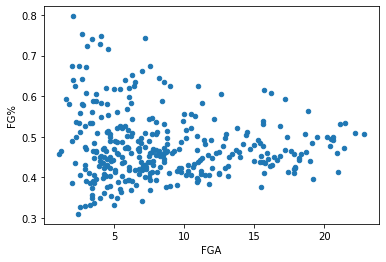

In [139]:
active_player_df.plot(x='FGA',y='FG%',kind='scatter',xlabel='FGA',ylabel='FG%');

Overall, there doesn't seem to be much of a strong relationship between FGA and FG%. The lower the FGA, the more variability in FG%. This makes sense given that the lower the shots taken, the more difference in percentage a shot made or missed makes. As FGA increase, FG% seems to stabilize more around 45% or so.

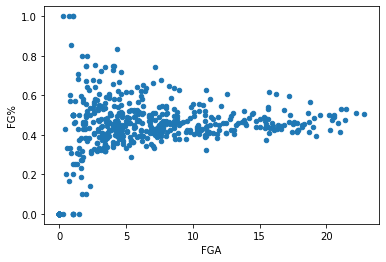

In [140]:
player2023_df.plot(x='FGA',y='FG%',kind='scatter',xlabel='FGA',ylabel='FG%')

Much greater variability, but a more obvious trend toward the mean FG% as FGA increase.

Interactive Plot

In [141]:
fig = px.scatter(active_player_df,x='FGA',y='FG%',hover_name='Player',hover_data=['Pos'],title='Player Volume and Accuracy',color='Pos',size='PTS')
fig.add_hline(active_player_df['FG%'].mean()+active_player_df['FG%'].std())
fig.add_vline(active_player_df['FGA'].mean()+active_player_df['FGA'].std())
fig.add_hline(active_player_df['FG%'].mean(),line_color='red',line_dash='dash')
fig.add_vline(active_player_df['FGA'].mean(),line_color='red',line_dash='dash')
#fig.update_layout(hovermode='x')
fig.show()

In [142]:
active_player_df['FG%'].mean(), active_player_df['FG%'].std()

(0.47785630498533727, 0.08290926931333684)

In [143]:
active_player_df['FG%'].mean()+active_player_df['FG%'].std()

0.5607655742986741

In [144]:
cond1 = active_player_df['FGA']>(active_player_df['FGA'].mean() + active_player_df['FGA'].std())
cond2 = active_player_df['FG%']> (active_player_df['FG%'].mean() + active_player_df['FG%'].std())

active_player_df[cond1 & cond2].sort_values(by='YAHOO',ascending=False)

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created
70,Anthony Davis,C,25.0,25.0,33.4,10.2,17.2,0.594,0.4,1.2,0.290,9.8,15.9,0.618,0.605,6.6,8.0,0.826,3.1,9.0,12.1,2.6,1.3,2.1,1.9,2.7,27.4,11.292434,19.020198,7.751963,0.7100,32.1
82,Kevin Durant,PF,36.0,36.0,36.0,10.6,18.8,0.564,1.7,4.7,0.361,8.9,14.1,0.632,0.610,6.7,7.2,0.931,0.3,6.4,6.8,5.5,0.8,1.5,3.5,2.4,29.6,8.288229,17.508341,3.349081,0.7475,36.6
158,Nikola Jokić,C,34.0,34.0,33.6,9.6,15.7,0.615,0.9,2.4,0.354,8.8,13.3,0.663,0.643,5.5,6.7,0.812,2.0,8.8,10.8,9.5,1.4,0.6,3.4,2.8,25.6,9.543071,17.080481,3.307264,0.7135,35.7
335,Zion Williamson,PF,29.0,29.0,33.0,9.8,16.2,0.608,0.2,0.7,0.368,9.6,15.5,0.618,0.615,6.1,8.6,0.714,2.0,5.0,7.0,4.6,1.1,0.6,3.4,2.2,26.0,6.228611,13.210374,1.985858,0.6610,31.2


In [145]:
active_player_df['FG%'].mean() + active_player_df['FG%'].std()

0.5607655742986741

In [146]:
get_player('Kevin Durant')

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2WAY,YAHOO,Defense,FG/FT%,Pts Created,Pts/Attempt
6,Kevin Durant,PF,36.0,36.0,36.0,10.6,18.8,0.564,1.7,4.7,0.361,8.9,14.1,0.632,0.61,6.7,7.2,0.931,0.3,6.4,6.8,5.5,0.8,1.5,3.5,2.4,29.6,8.288229,17.508341,3.349081,0.7475,36.6,1.218085


In [147]:
fig = px.scatter(active_player_df,x='FGA',y='PTS',hover_name='Player',hover_data=['Pos'],title='Player Volume and PTS',color='Pos')
fig.add_hline(active_player_df['PTS'].mean()+active_player_df['PTS'].std())
fig.add_vline(active_player_df['FGA'].mean()+active_player_df['FGA'].std())
fig.add_hline(active_player_df['PTS'].mean(),line_color='red',line_dash='dash')
fig.add_vline(active_player_df['FGA'].mean(),line_color='red',line_dash='dash')
#fig.update_layout(hovermode='x')
fig.show()

3P% and 3PA

In [148]:
fig = px.scatter(active_player_df,x='3PA',y='3P%',hover_name='Player',hover_data=['Pos'],title='3P% vs 3PA',color='Pos')
fig.add_hline(active_player_df['3P%'].mean()+active_player_df['3P%'].std())
fig.add_vline(active_player_df['3PA'].mean()+active_player_df['3PA'].std())
fig.add_hline(active_player_df['3P%'].mean(),line_color='red',line_dash='dash')
fig.add_vline(active_player_df['3PA'].mean(),line_color='red',line_dash='dash')
#fig.update_layout(hovermode='x')
fig.show()

In [149]:
active_player_df['2P%'].mean(),active_player_df['3P%'].mean()

(0.5450703812316716, 0.3289736070381232)